In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing Data
data_hedonic = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [5]:
data = pd.concat([data_hedonic, data_utilitarian])

In [3]:
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE',
]

# Product Analysis

In [6]:
# Assuming df is your DataFrame containing the 'Product' column

# Get the unique products
unique_products = data['product'].unique()

# Print the unique products
print("Unique Products:")
for product in unique_products:
    print(product)


Unique Products:
Video Games
Facial Spray
Chocolate
Music
Perfume
Toilet Paper
Battery
Filter
Gaming Mouse
Hair Brush


In [9]:
# Assuming df is your DataFrame containing the 'Product' column

# Get the unique products
unique_products = data['main_category'].unique()

# Print the unique products
print("Unique Products:")
for product in unique_products:
    print(product)


Unique Products:
Video Games
Beauty
Grocery
Music
Electronics
Appliances


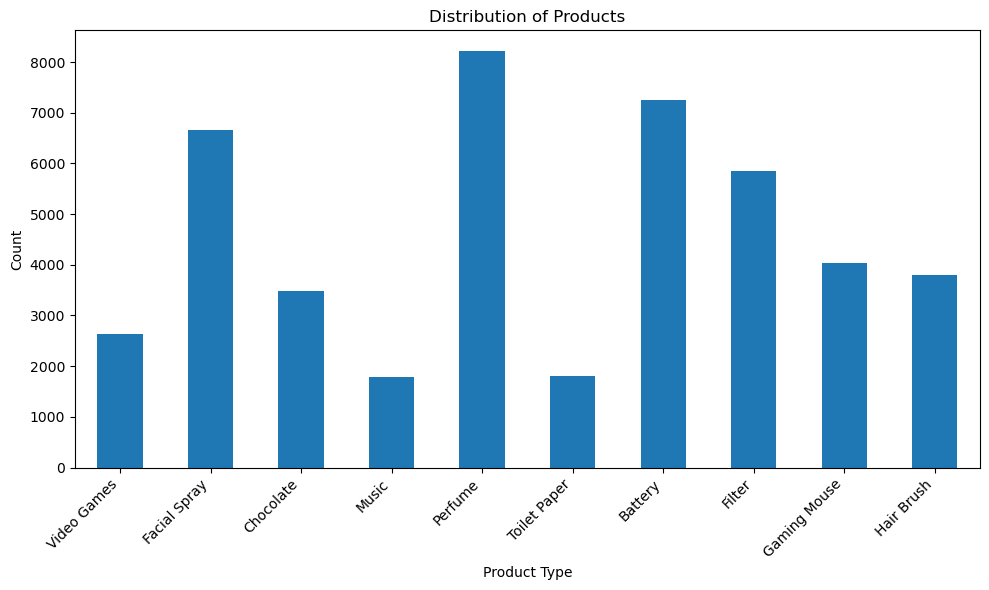

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the product data

product_counts = data['product'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


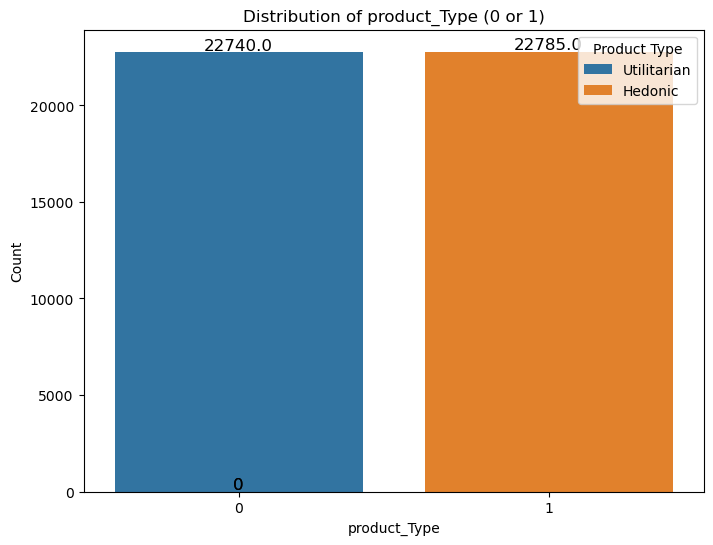

In [8]:
import seaborn as sns

# Assuming df is your DataFrame with the product_Type column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()


In [8]:
import scipy.stats as stats

# Define your features
features = [
    'rating', 'average_rating', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'FRE', 'subjective_score'
]

# Perform statistical testing for each feature
for feature in features:
    prod_type_0 = data[data['prod_type'] == 0][feature]
    prod_type_1 = data[data['prod_type'] == 1][feature]
    t_stat, p_value = stats.ttest_ind(prod_type_0, prod_type_1)
    if p_value < 0.01:  # Considering statistical significance at alpha = 0.05
        print(f"Feature: {feature}")
        print(f"T-statistic: {t_stat}, p-value: {p_value}")
        print()


Feature: rating
T-statistic: -25.23785970949677, p-value: 1.409509506846641e-139

Feature: average_rating
T-statistic: 8.36834521728209, p-value: 6.007228992259646e-17

Feature: sentiment
T-statistic: -28.389734119011628, p-value: 9.281787894882387e-176

Feature: price
T-statistic: 38.5186133179792, p-value: 0.0

Feature: #adj
T-statistic: 3.0156242757704983, p-value: 0.0025659221186578826

Feature: #adv
T-statistic: 14.351549927688037, p-value: 1.3171872284802219e-46

Feature: #nouns
T-statistic: 2.962833610682964, p-value: 0.0030497886558484835

Feature: word_count
T-statistic: 21.180464517985392, p-value: 4.356696409358409e-99

Feature: sent_count
T-statistic: 15.331733272769824, p-value: 6.366383772823949e-53

Feature: sent_length
T-statistic: 16.9069188607898, p-value: 6.274393383291108e-64

Feature: title_length
T-statistic: -14.523336009707705, p-value: 1.10241538597755e-47

Feature: review_ext
T-statistic: -25.798331151378562, p-value: 1.0374036660375656e-145

Feature: elap_day

# Summary statistic of features

In [17]:
# Summary of hedonic data
summary_stats_hedonic = data_hedonic.groupby('product').agg({
    'rating': ['mean', 'median', 'std'],
    'sentiment': ['mean', 'median', 'std'],
    'subjective_score': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'sent_count': ['mean', 'median', 'std'],
    'sent_length': ['mean', 'median', 'std'],
    'title_length': ['mean', 'median', 'std'],
    'review_ext': ['mean', 'median', 'std'],
    '#adj': ['mean', 'median', 'std'],
    '#adv': ['mean', 'median', 'std'],
    '#nouns': ['mean', 'median', 'std'],
    'elap_days': ['mean', 'median', 'std'],
    'image': ['mean', 'median', 'std'],
    'FRE': ['mean', 'median', 'std'],

})
# Flatten the MultiIndex columns
summary_stats_hedonic.columns = ['_'.join(col).strip() for col in summary_stats_hedonic.columns.values]

# Transpose the DataFrame
summary_stats_hedonic = summary_stats_hedonic.transpose()

# Display the DataFrame
print(summary_stats_hedonic)

summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Summary_Stats_Hedonic.csv')


product                   Chocolate  Facial Spray       Music      Perfume  \
rating_mean                4.474835      4.328683    3.935014     4.332968   
rating_median              5.000000      5.000000    5.000000     5.000000   
rating_std                 1.183052      1.247284    1.515699     1.227269   
sentiment_mean             3.398332      3.374137    2.954622     3.356221   
sentiment_median           4.000000      4.000000    4.000000     4.000000   
sentiment_std              1.296329      1.283802    1.516968     1.261484   
subjective_score_mean      0.800772      0.819000    0.814816     0.782280   
subjective_score_median    0.926666      0.910280    0.916694     0.882145   
subjective_score_std       0.252819      0.207781    0.228768     0.235871   
word_count_mean           20.039689     29.754425   30.536134    22.943511   
word_count_median         13.000000     19.000000   16.000000    13.000000   
word_count_std            23.876050     37.400260   48.688966   

In [25]:
summary_stats_hedonic = data_hedonic.groupby('product').agg({
    'rating': ['mean'],
    'sentiment': ['mean'],
    'subjective_score': ['mean'],
    'word_count': ['mean'],
    'sent_count': ['mean'],
    'sent_length': ['mean'],
    'title_length': ['mean'],
    'review_ext': ['mean'],
    '#adj': ['mean'],
    '#adv': ['mean'],
    '#nouns': ['mean'],
    'elap_days': ['mean'],
    'image': ['mean'],
    'FRE': ['mean'],
})

# Flatten the MultiIndex columns
summary_stats_hedonic.columns = ['_'.join(col).strip() for col in summary_stats_hedonic.columns.values]

# Transpose the DataFrame
summary_stats_hedonic = summary_stats_hedonic.transpose()

# Display the DataFrame
print(summary_stats_hedonic)

summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Summary_Stats_Hedonic_mean.csv')



product                 Chocolate  Facial Spray       Music      Perfume  \
rating_mean              4.474835      4.328683    3.935014     4.332968   
sentiment_mean           3.398332      3.374137    2.954622     3.356221   
subjective_score_mean    0.800772      0.819000    0.814816     0.782280   
word_count_mean         20.039689     29.754425   30.536134    22.943511   
sent_count_mean          2.100661      2.617012    2.757423     2.192841   
sent_length_mean        10.906454     12.317266   12.088672    11.548640   
title_length_mean        1.853034      1.539004    1.774230     1.500487   
review_ext_mean         -0.325165     -0.171317   -0.711485    -0.267032   
#adj_mean                0.123089      0.117045    0.112678     0.135589   
#adv_mean                0.065466      0.072843    0.065355     0.074217   
#nouns_mean              0.196844      0.183703    0.180663     0.193209   
elap_days_mean         855.471671   1813.797480  726.700840  1692.213416   
image_mean  

In [26]:
# Summary of utilitarian data

summary_stats_utilitarian = data_utilitarian.groupby('product').agg({
    'rating': ['mean', 'median', 'std'],
    'sentiment': ['mean', 'median', 'std'],
    'subjective_score': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'sent_count': ['mean', 'median', 'std'],
    'sent_length': ['mean', 'median', 'std'],
    'title_length': ['mean', 'median', 'std'],
    'review_ext': ['mean', 'median', 'std'],
    '#adj': ['mean', 'median', 'std'],
    '#adv': ['mean', 'median', 'std'],
    '#nouns': ['mean', 'median', 'std'],
    'elap_days': ['mean', 'median', 'std'],
    'image': ['mean', 'median', 'std'],
    'FRE': ['mean', 'median', 'std'],

})
# Flatten the MultiIndex columns
summary_stats_utilitarian.columns = ['_'.join(col).strip() for col in summary_stats_utilitarian.columns.values]

# Transpose the DataFrame
summary_stats_utilitarian = summary_stats_utilitarian.transpose()

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Summary_Stats_Utilitarian.csv')

product                      Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean                 3.900000     4.066188      3.800099     4.467827   
rating_median               5.000000     5.000000      5.000000     5.000000   
rating_std                  1.552382     1.521731      1.560987     1.114409   
sentiment_mean              2.860744     2.986318      2.754904     3.428270   
sentiment_median            4.000000     4.000000      4.000000     4.000000   
sentiment_std               1.676241     1.618873      1.604537     1.190228   
subjective_score_mean       0.755289     0.780777      0.818780     0.847813   
subjective_score_median     0.830232     0.858723      0.885087     0.920980   
subjective_score_std        0.233592     0.223256      0.187243     0.175822   
word_count_mean            27.823554    24.380879     64.374969    38.497627   
word_count_median          17.000000    12.000000     40.000000    26.000000   
word_count_std             36.151449    

In [27]:
summary_stats_utilitarian = data_utilitarian.groupby('product').agg({
    'rating': ['mean'],
    'sentiment': ['mean'],
    'subjective_score': ['mean'],
    'word_count': ['mean'],
    'sent_count': ['mean'],
    'sent_length': ['mean'],
    'title_length': ['mean'],
    'review_ext': ['mean'],
    '#adj': ['mean'],
    '#adv': ['mean'],
    '#nouns': ['mean'],
    'elap_days': ['mean'],
    'FRE': ['mean'],
})

# Flatten the MultiIndex columns
summary_stats_utilitarian.columns = ['_'.join(col).strip() for col in summary_stats_utilitarian.columns.values]

# Transpose the dataframe
summary_stats_utilitarian

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Summary_Stats_Utilitarian_mean.csv')


              rating_mean  sentiment_mean  subjective_score_mean  \
product                                                            
Battery          3.900000        2.860744               0.755289   
Filter           4.066188        2.986318               0.780777   
Gaming Mouse     3.800099        2.754904               0.818780   
Hair Brush       4.467827        3.428270               0.847813   
Toilet Paper     3.721058        2.689636               0.768247   

              word_count_mean  sent_count_mean  sent_length_mean  \
product                                                            
Battery             27.823554         2.346694         12.732280   
Filter              24.380879         2.260133         10.704878   
Gaming Mouse        64.374969         3.794140         19.431932   
Hair Brush          38.497627         3.160601         13.414340   
Toilet Paper        24.546858         2.319184         12.115130   

              title_length_mean  review_ext_me

In [22]:

# Assuming df is your DataFrame with the columns mentioned
summary_stats_prodType= data.groupby('prod_type').agg({
    'rating': ['mean', 'median', 'std'],
    'sentiment': ['mean', 'median', 'std'],
    'subjective_score': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'sent_count': ['mean', 'median', 'std'],
    'sent_length': ['mean', 'median', 'std'],
    'title_length': ['mean', 'median', 'std'],
    'review_ext': ['mean', 'median', 'std'],
    '#adj': ['mean', 'median', 'std'],
    '#adv': ['mean', 'median', 'std'],
    '#nouns': ['mean', 'median', 'std'],
    'elap_days': ['mean', 'median', 'std'],
    'image': ['mean', 'median', 'std'],
    'FRE': ['mean', 'median', 'std'],

})
# Flatten the MultiIndex columns
summary_stats_prodType.columns = ['_'.join(col).strip() for col in summary_stats_prodType.columns.values]


summary_stats_prodType = summary_stats_prodType.transpose()

# Display the DataFrame
print(summary_stats_prodType)

summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Summary_Stats_ProdType.csv')

prod_type                          0            1
rating_mean                 4.005453     4.332894
rating_median               5.000000     5.000000
rating_std                  1.500448     1.257352
sentiment_mean              2.955277     3.341935
sentiment_median            4.000000     4.000000
sentiment_std               1.590512     1.301316
subjective_score_mean       0.789549     0.799780
subjective_score_median     0.867843     0.902631
subjective_score_std        0.214722     0.232187
word_count_mean            34.929771    26.139302
word_count_median          20.000000    15.000000
word_count_std             49.194706    38.750106
sent_count_mean             2.714292     2.378539
sent_count_median           2.000000     2.000000
sent_count_std              2.516306     2.141563
sent_length_mean           13.461926    11.812919
sent_length_median         11.000000     9.800000
sent_length_std            11.161934     9.590727
title_length_mean           1.371636     1.604872


# 1. Correlation Analysis with output variable helpful-ratio

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


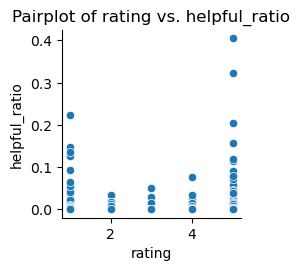

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


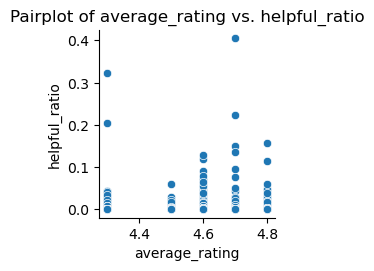

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


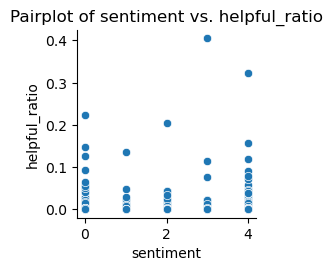

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


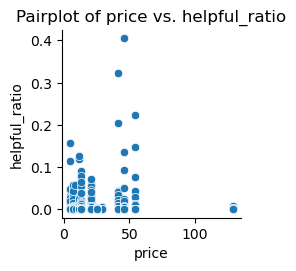

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


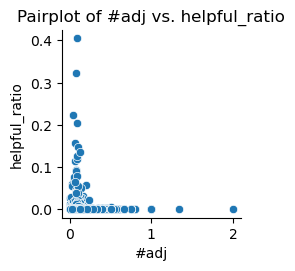

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


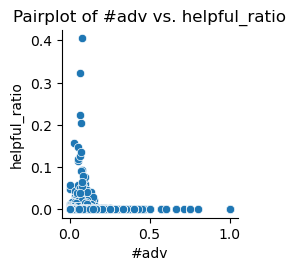

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


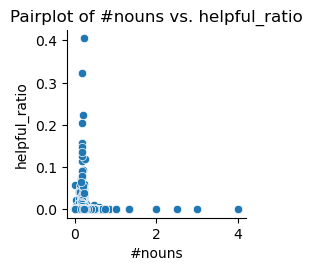

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


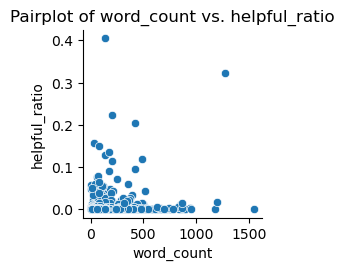

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


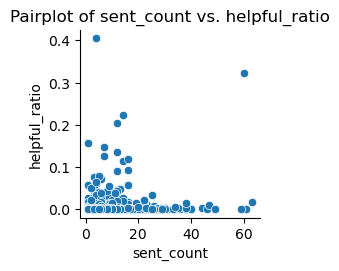

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


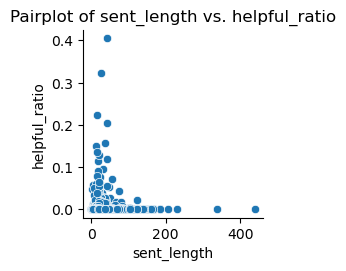

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


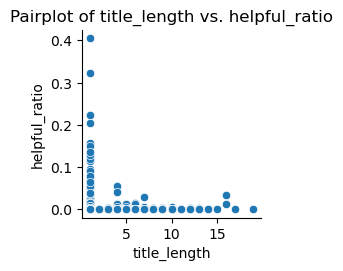

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


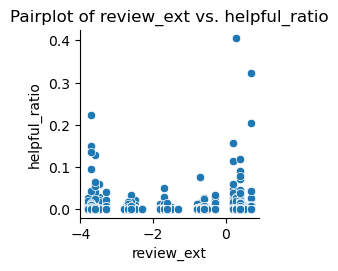

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


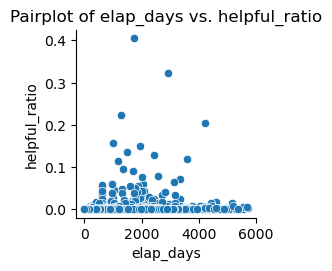

/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


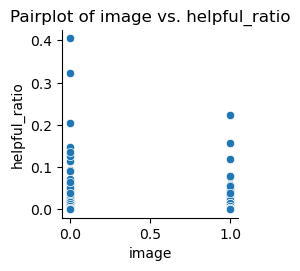

ValueError: cannot reindex from a duplicate axis

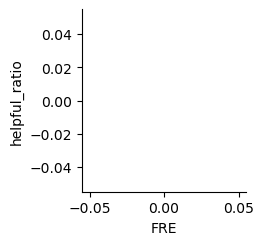

In [27]:
# Starting with simple scatterplots to analyze linear relationship (Correlation between features and output variable)

# Pairplot: Visualizing pairwise relationships between features and the output variable
for covariate in features:
    sns.pairplot(data, x_vars=[covariate], y_vars=['helpful_ratio'])
    plt.title(f'Pairplot of {covariate} vs. helpful_ratio')
    plt.show()

# Correlation between features and output variable
corr_with_output = data[features + ['helpful_ratio']].corr()['helpful_ratio'].sort_values(ascending=False)
print(corr_with_output)

# Boxplot: Visualizing the distribution of the output variable across different levels of categorical features
categorical_features = ['year', 'month', 'day', 'hour']  # Assuming these are categorical
for feature in categorical_features:
    sns.boxplot(x=feature, y='helpful_ratio', data=data)
    plt.title(f'Boxplot of helpful_ratio across {feature}')
    plt.xticks(rotation=45)
    plt.show()

# These are basic examples. Depending on your dataset, you might perform more specific analyses.


# Analysis for each data set

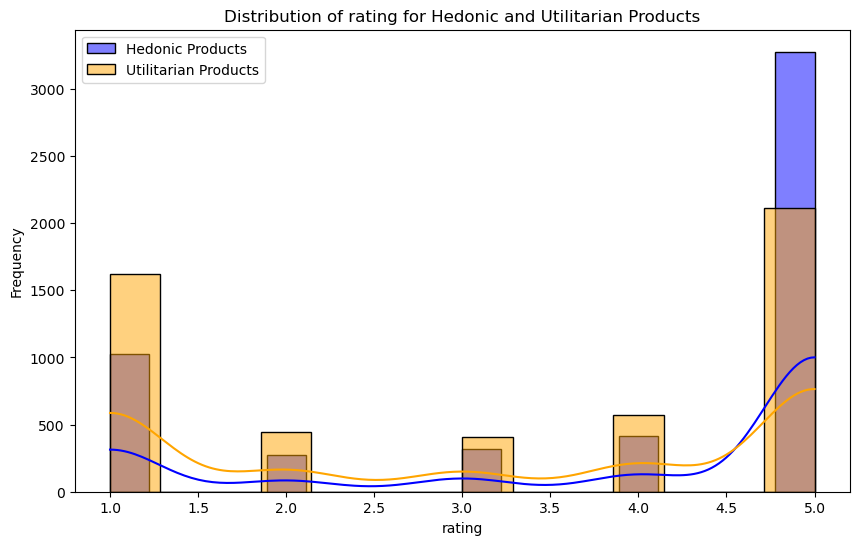

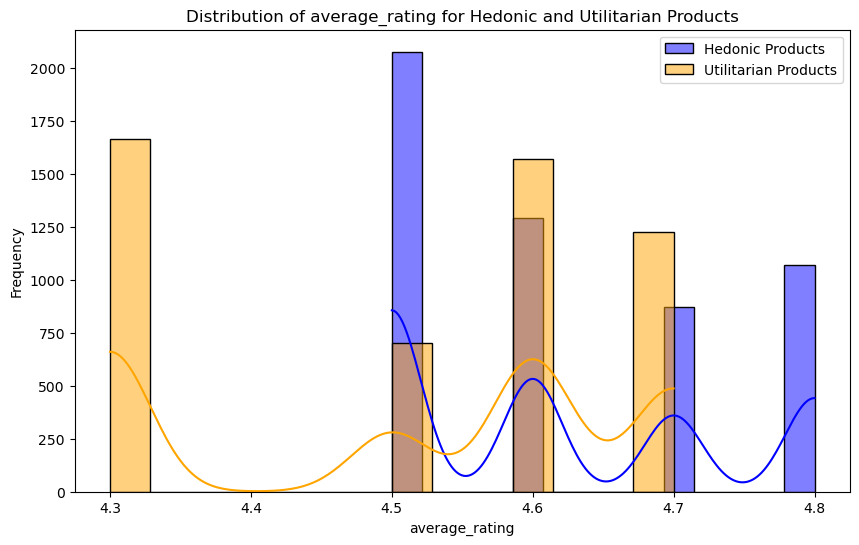

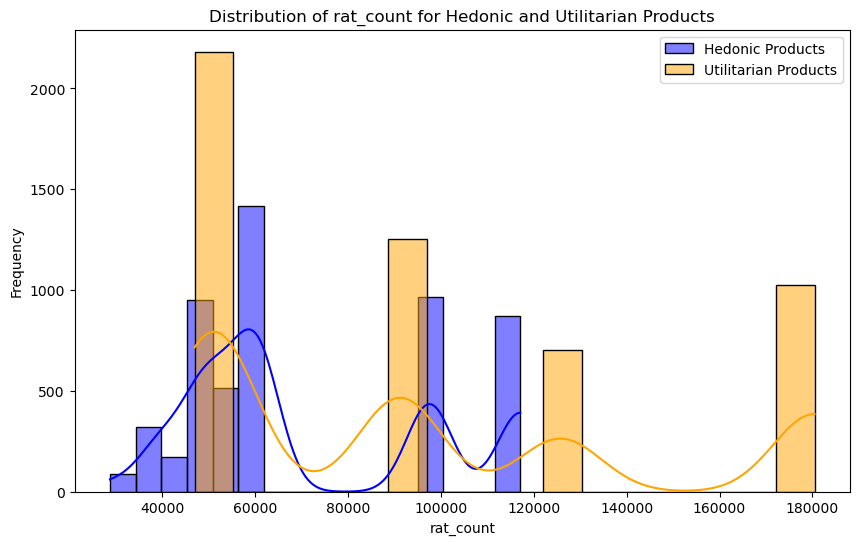

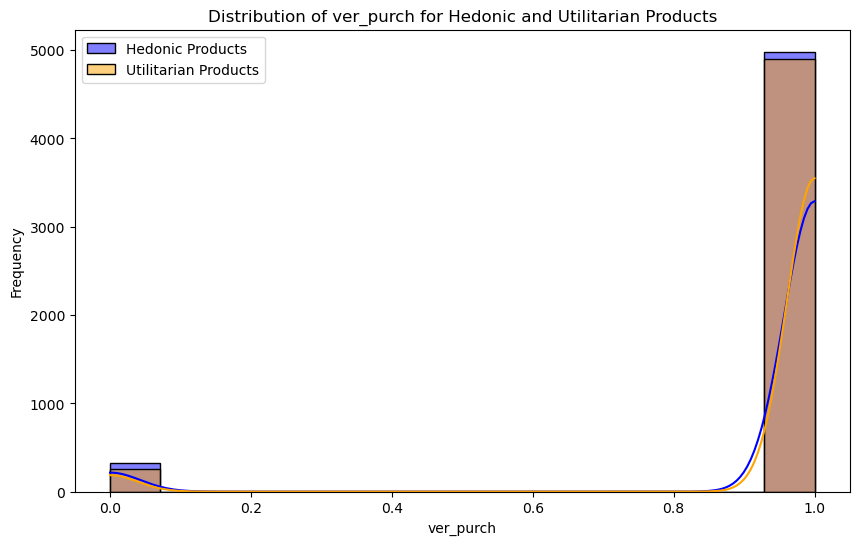

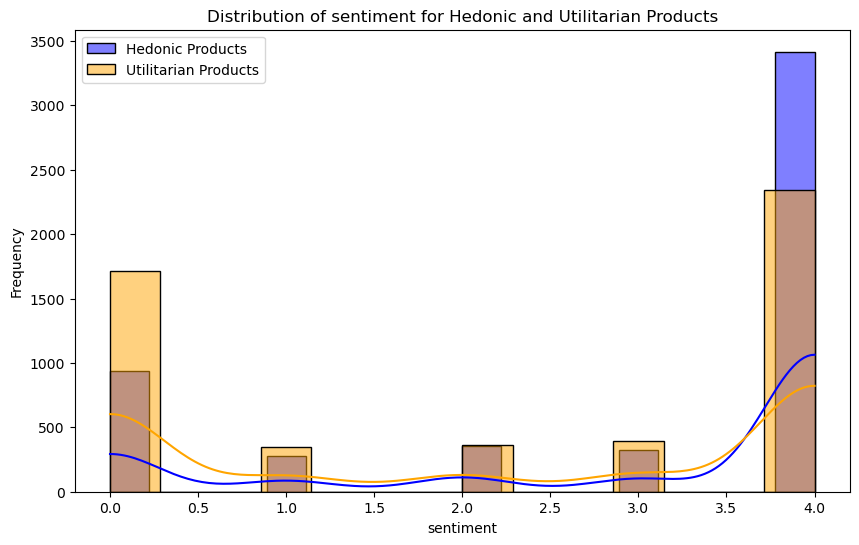

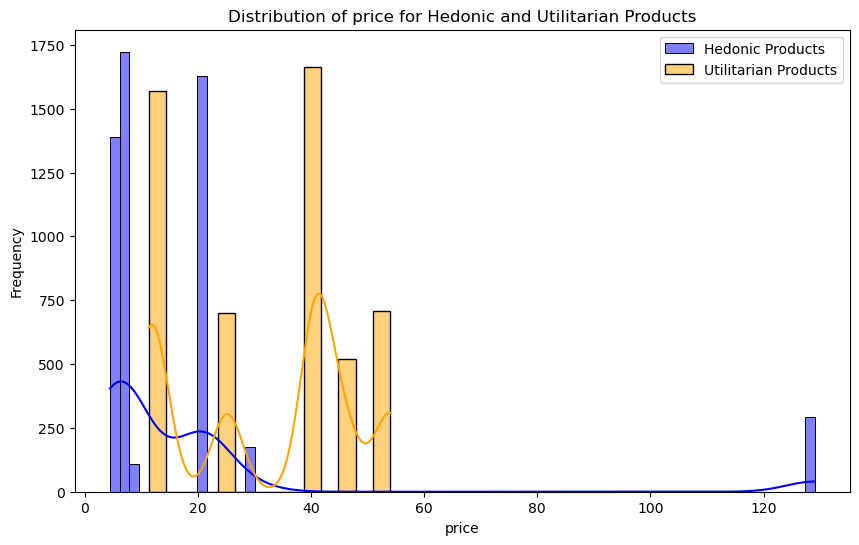

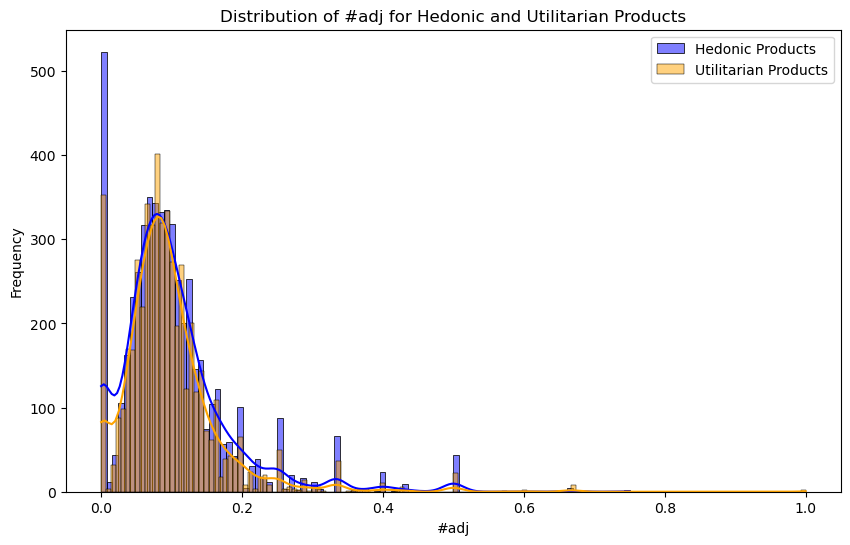

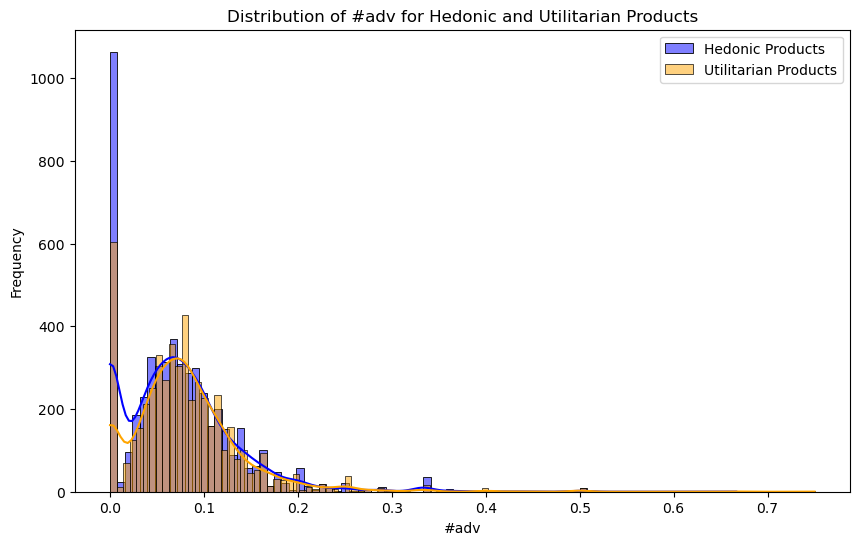

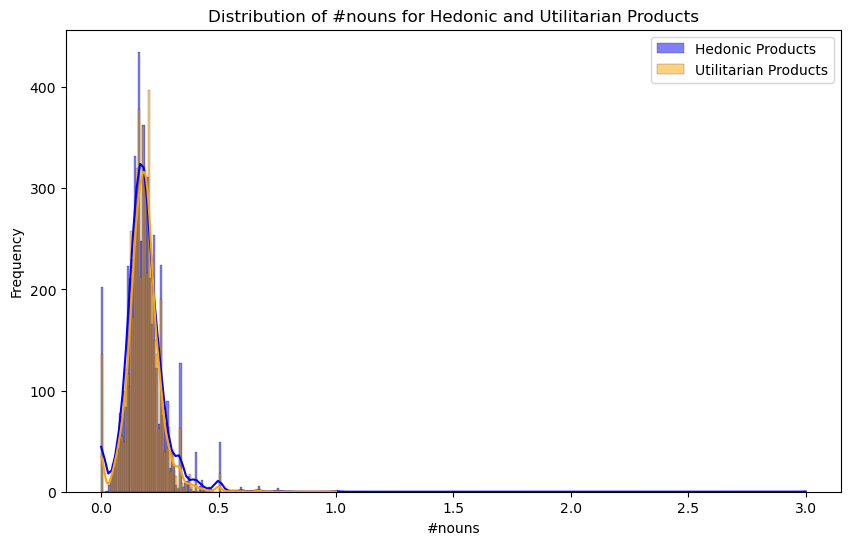

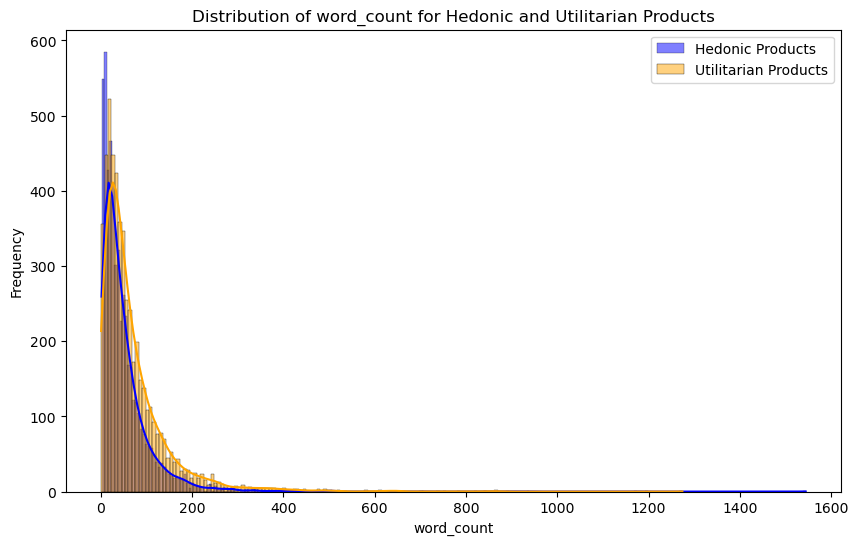

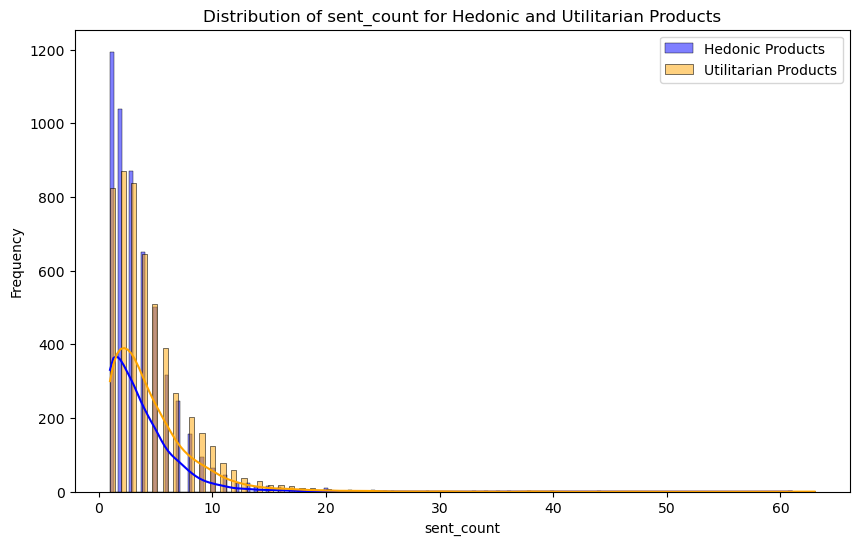

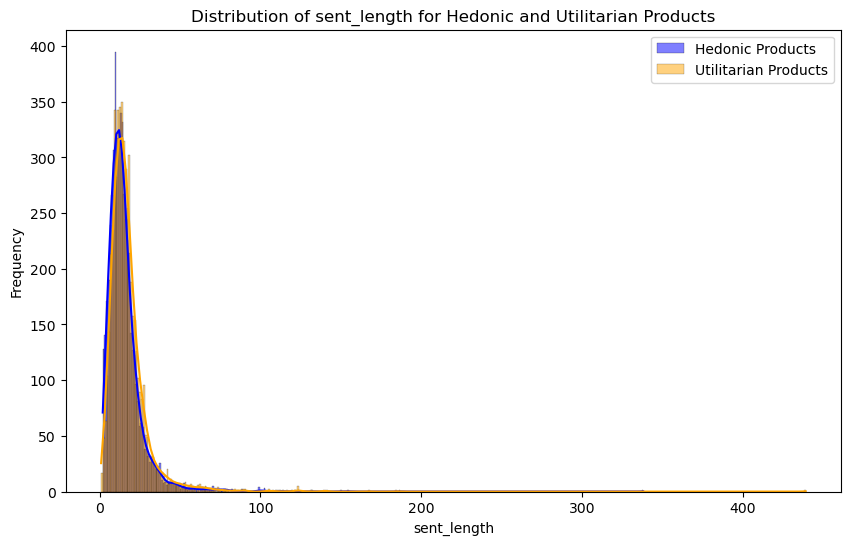

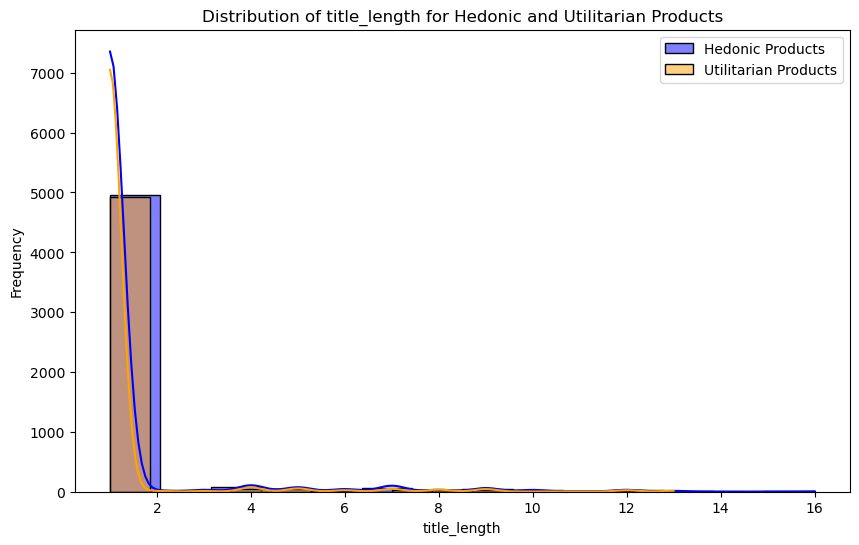

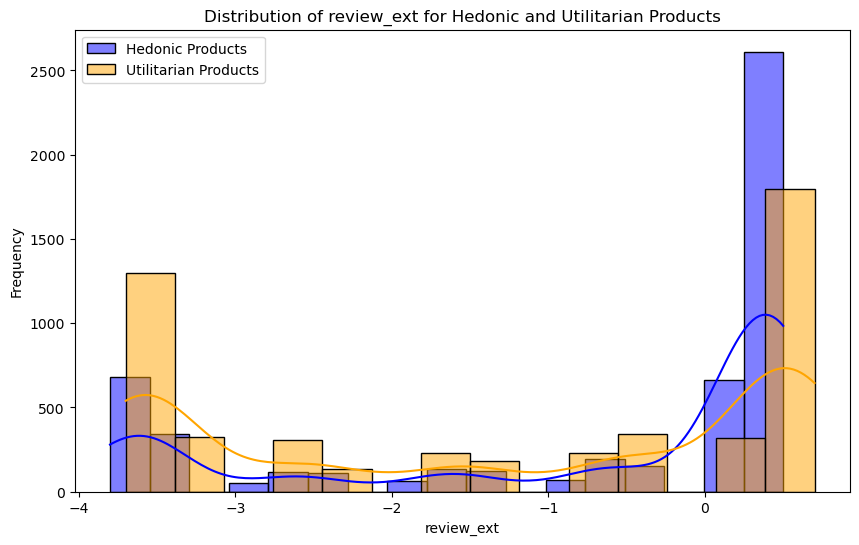

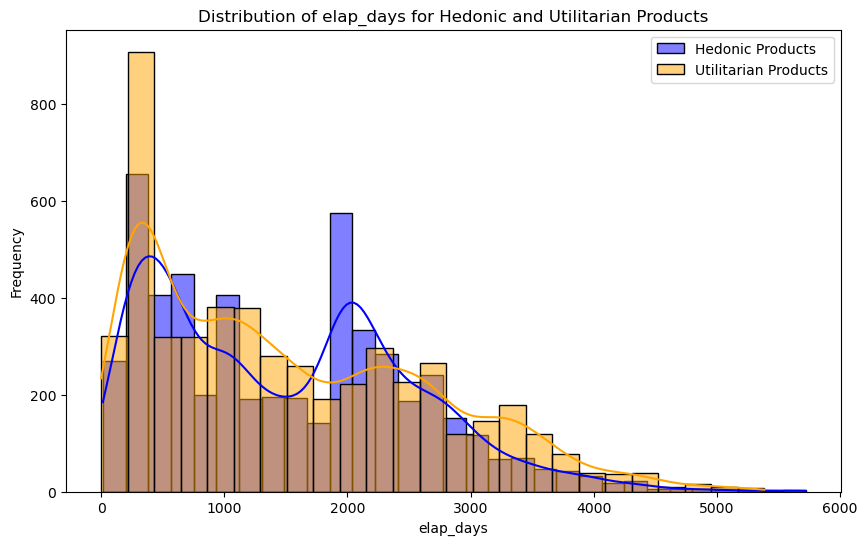

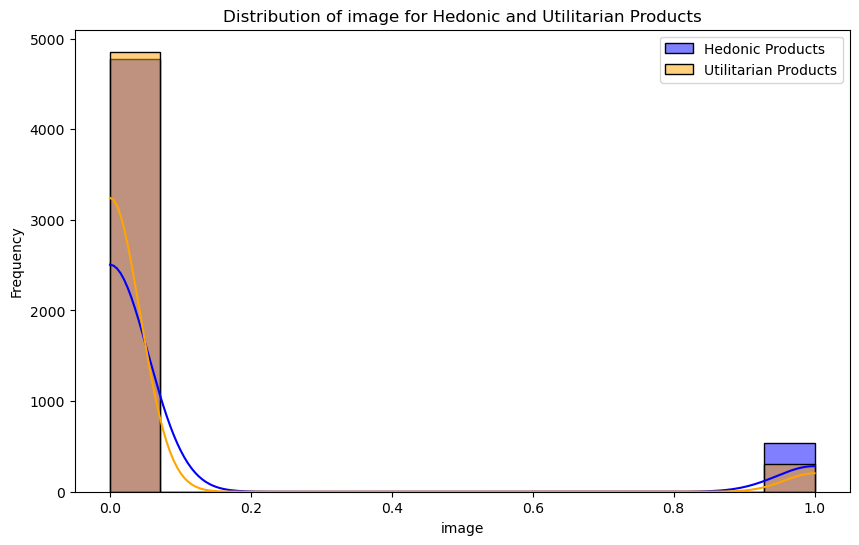

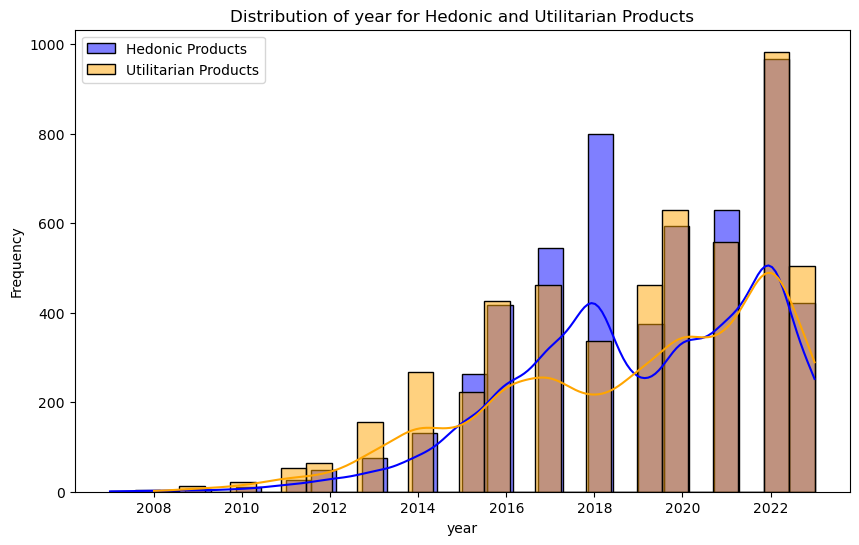

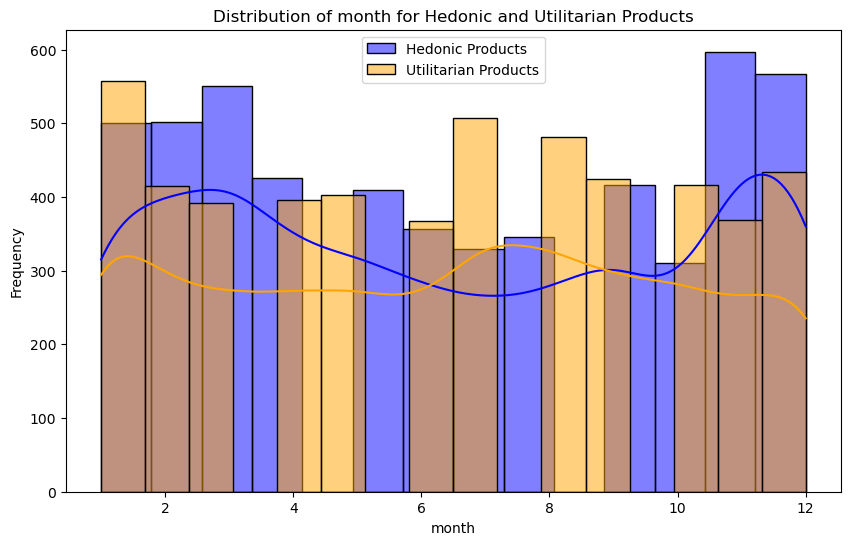

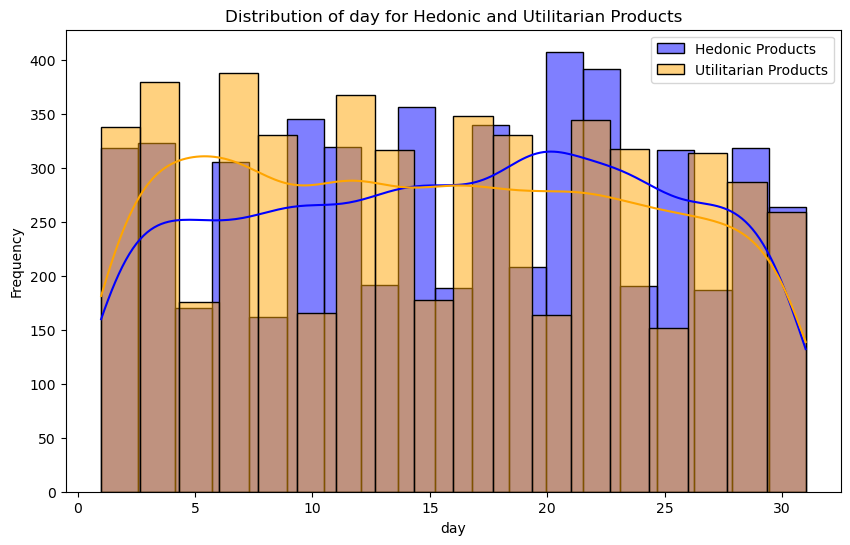

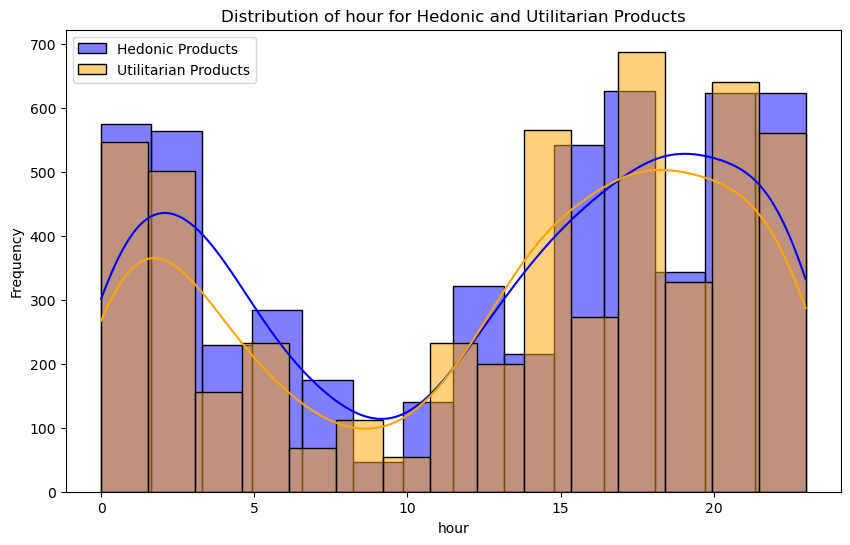

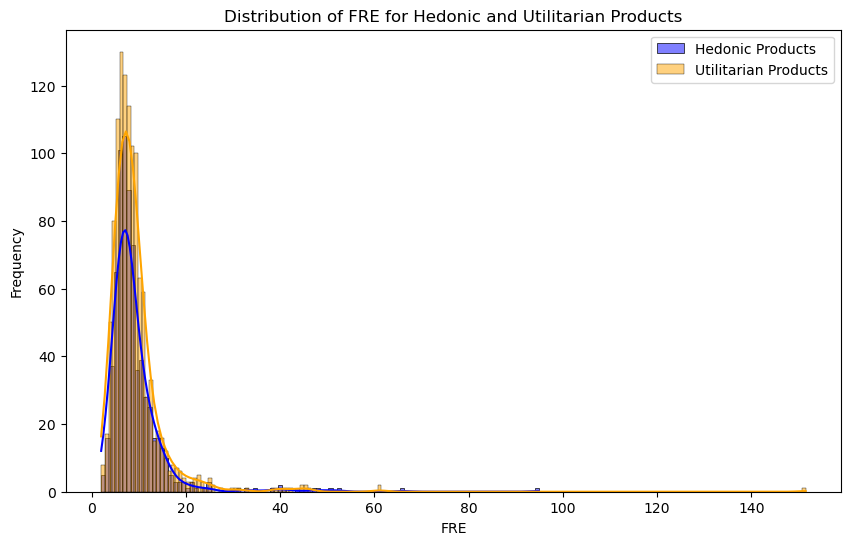

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


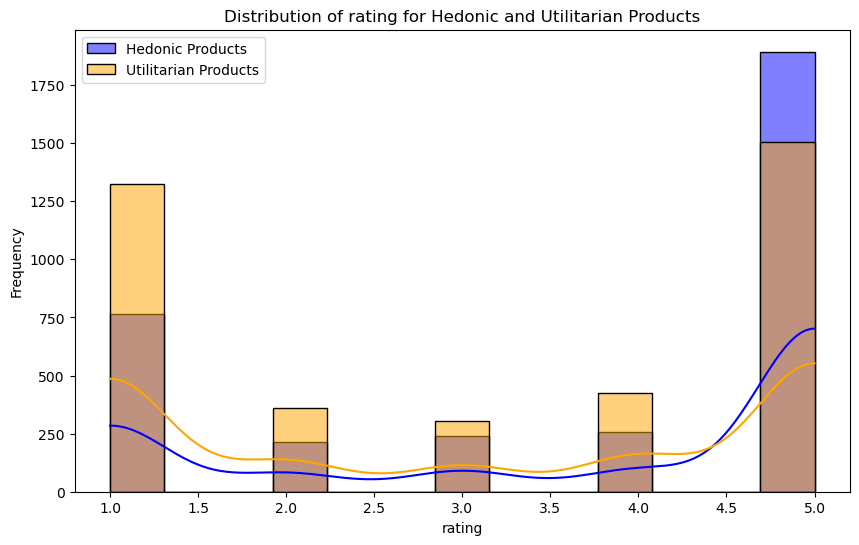

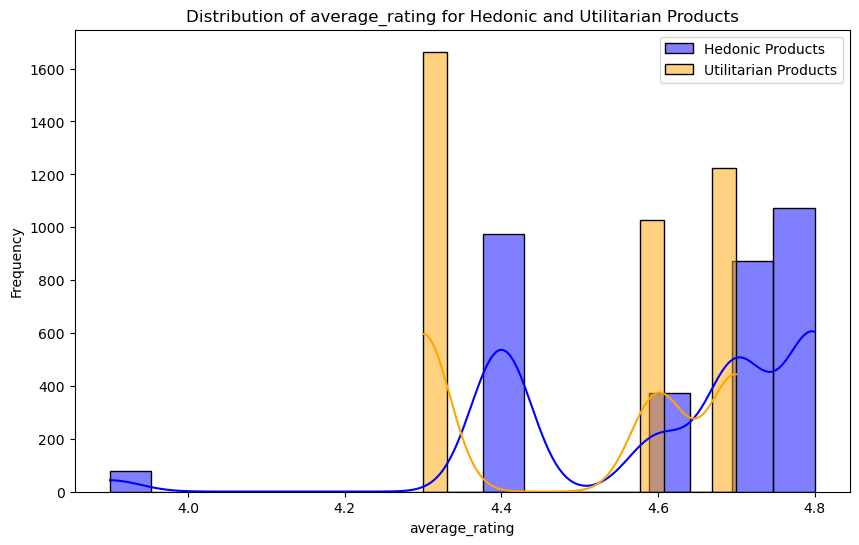

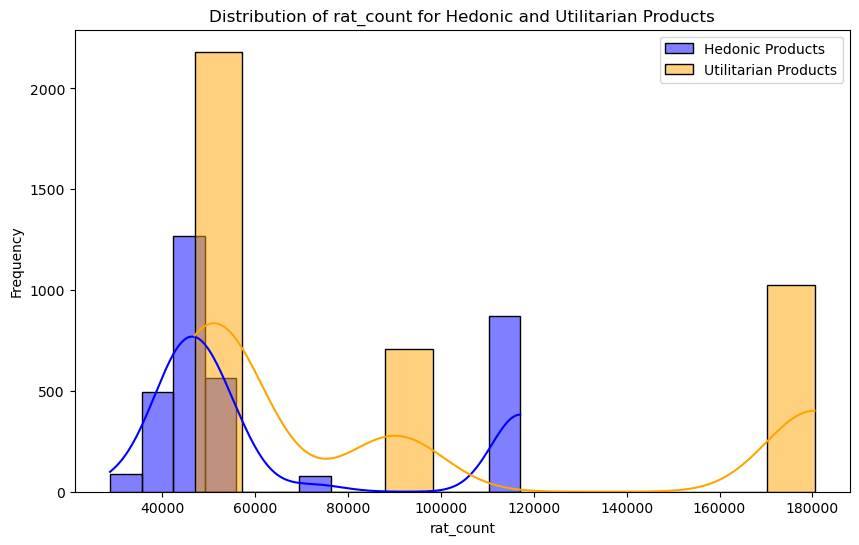

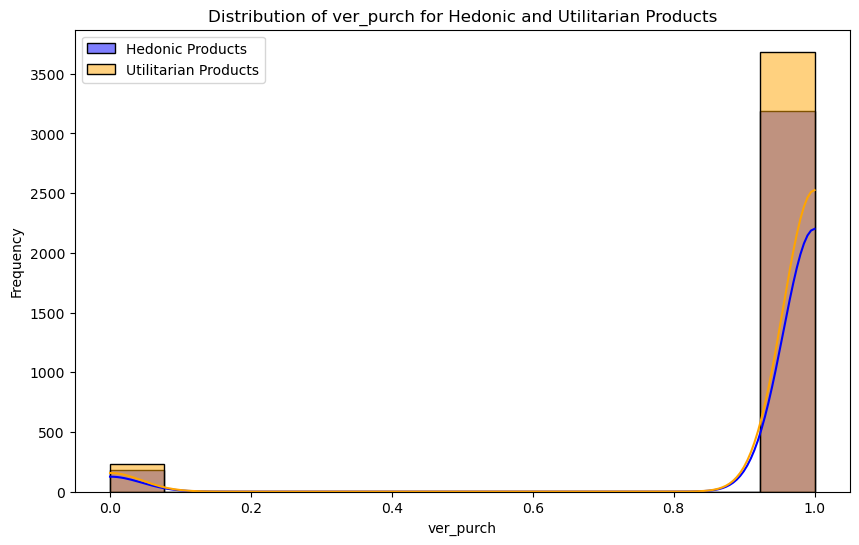

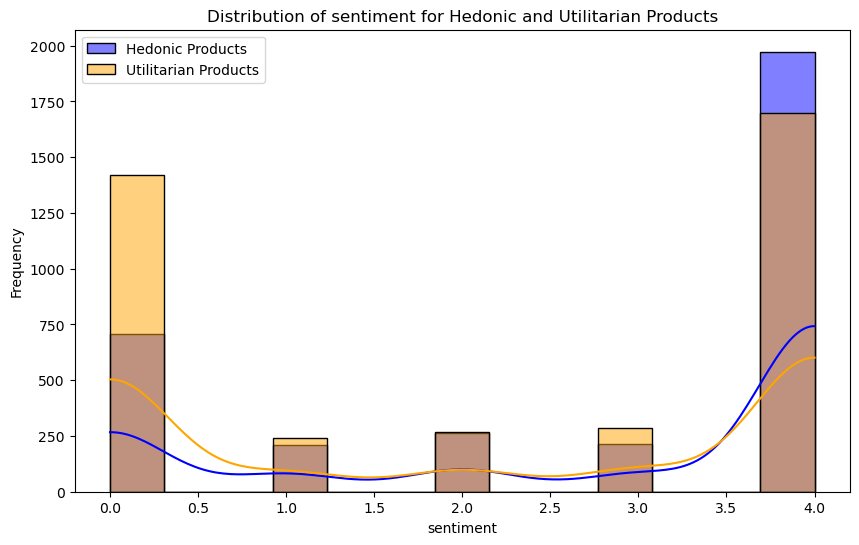

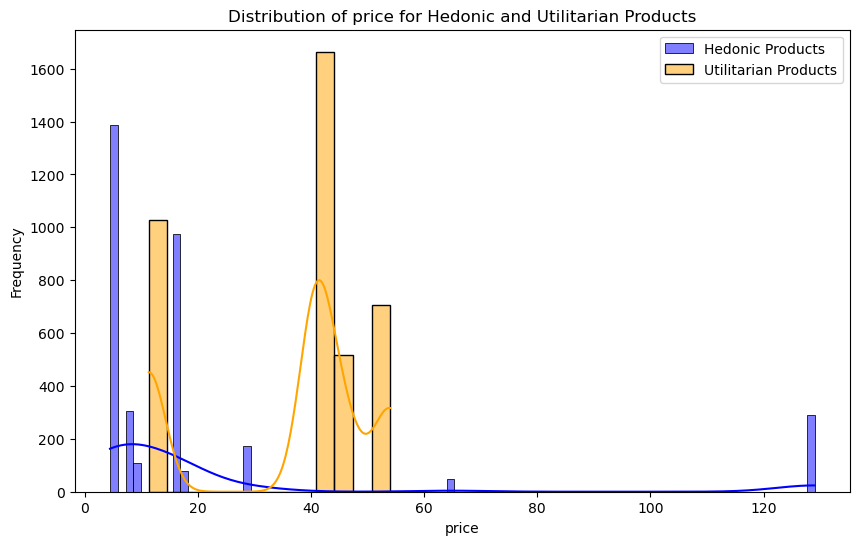

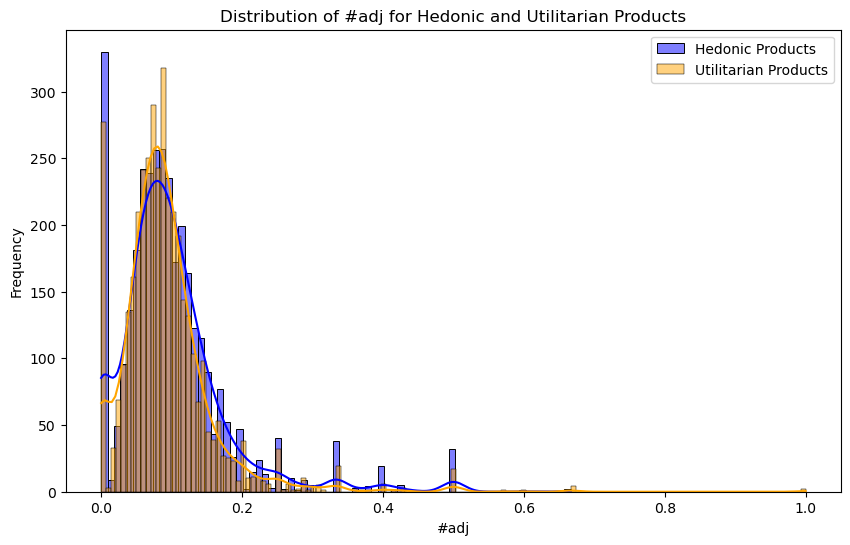

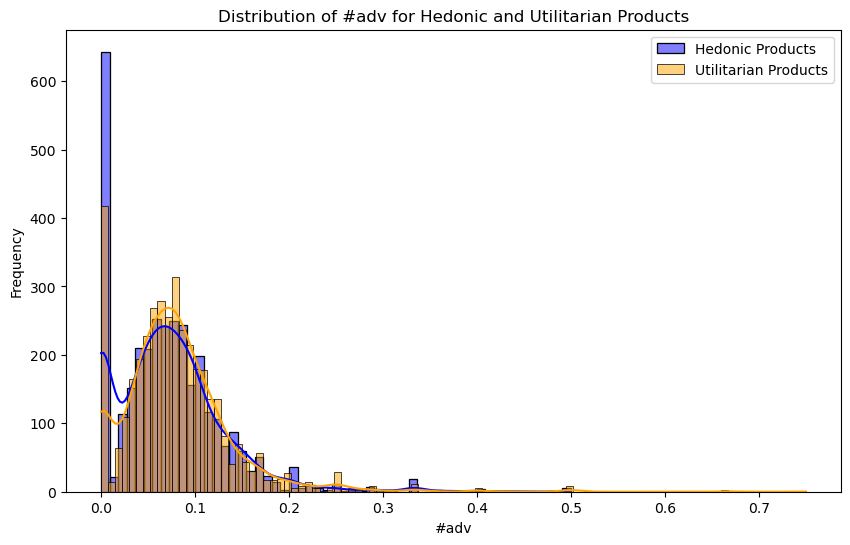

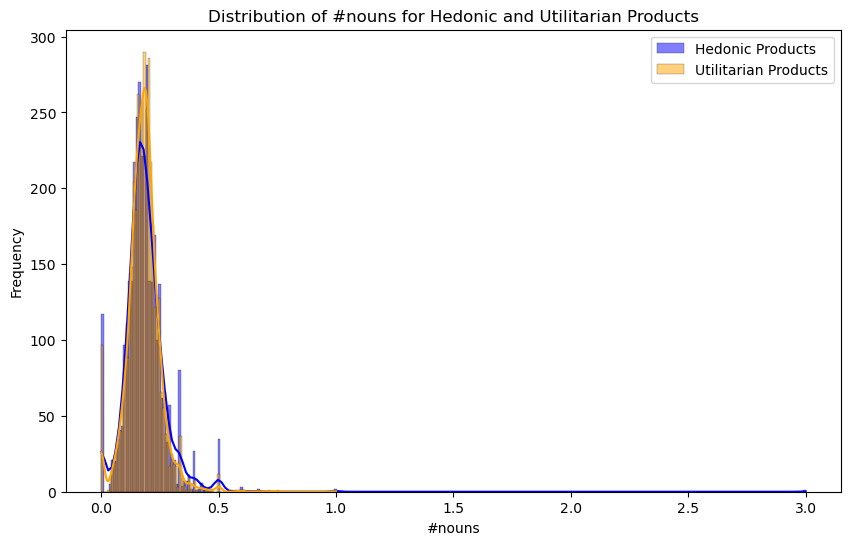

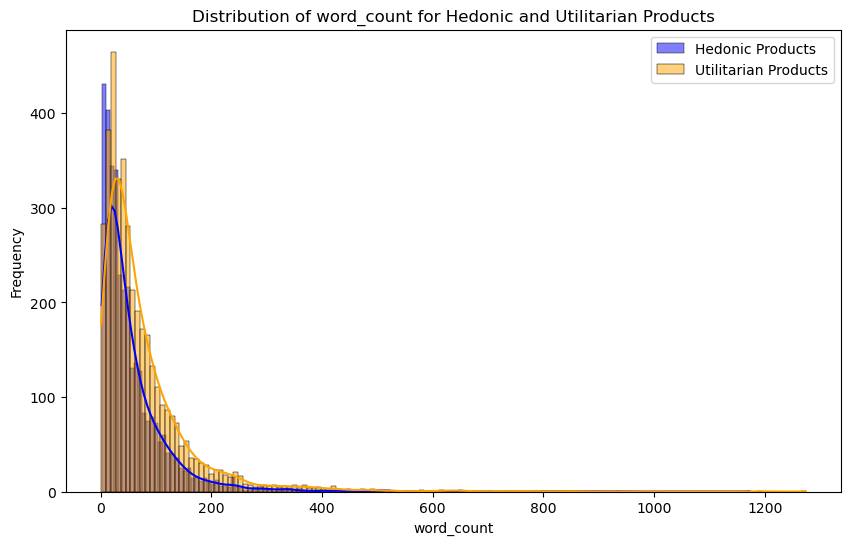

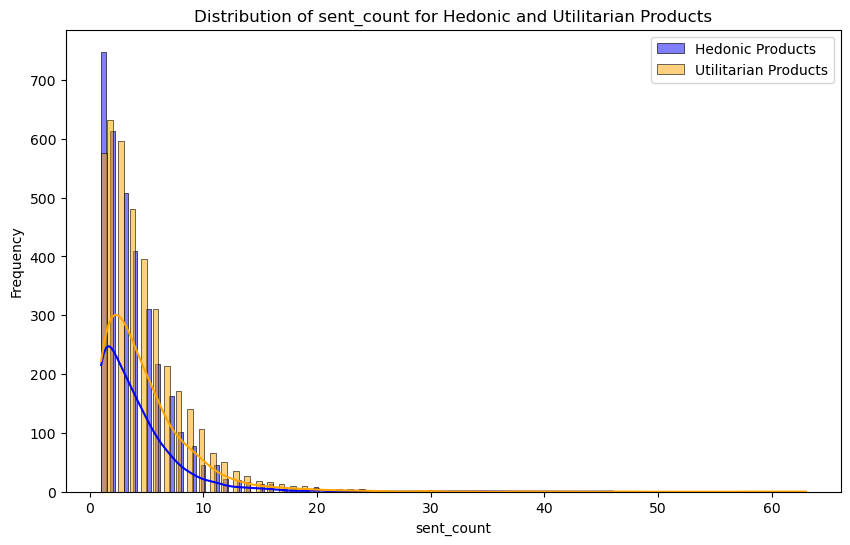

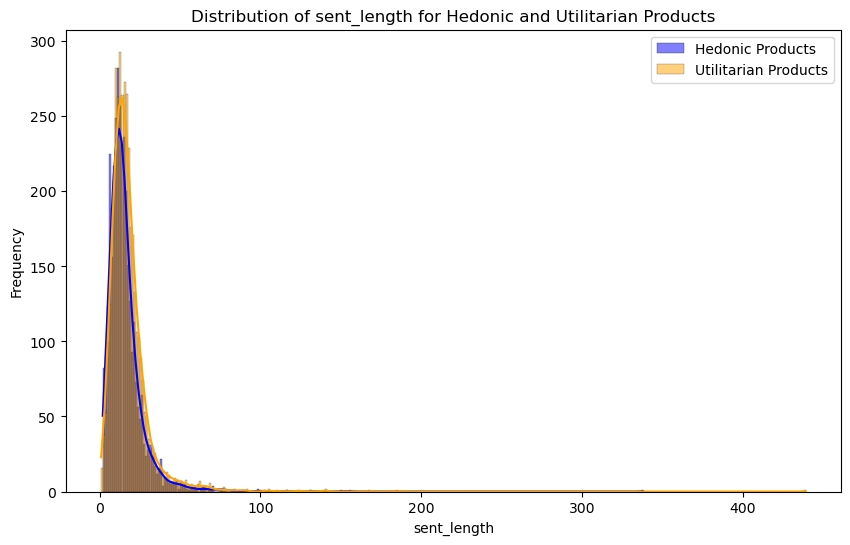

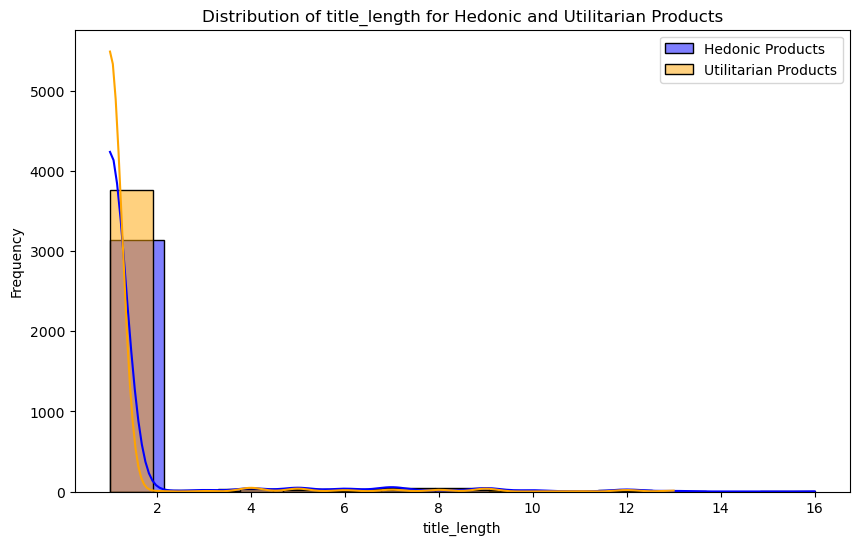

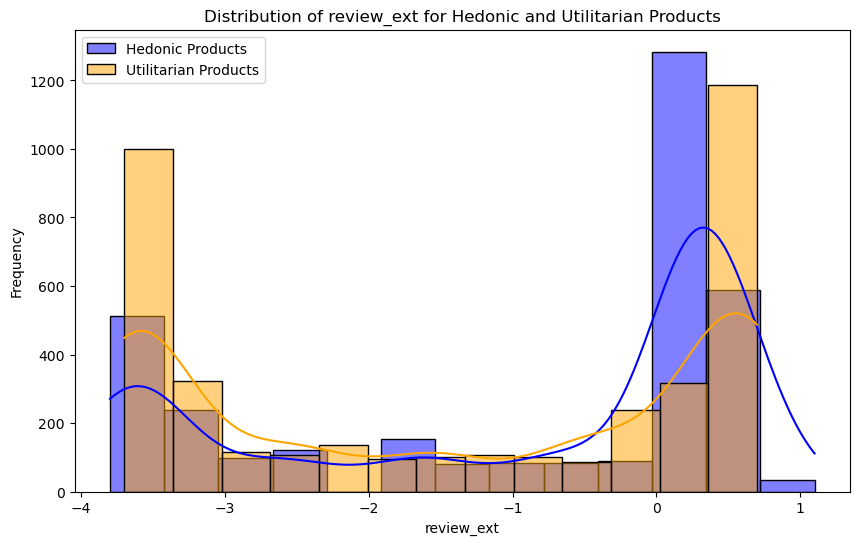

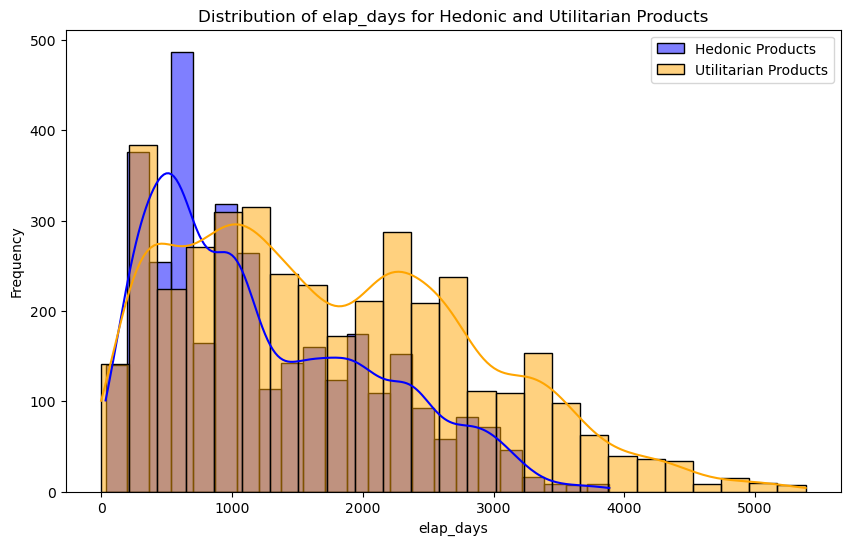

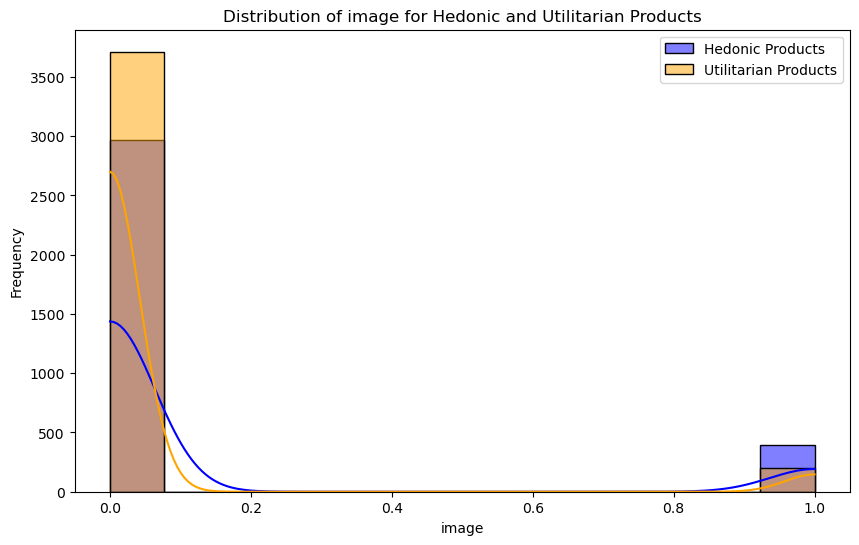

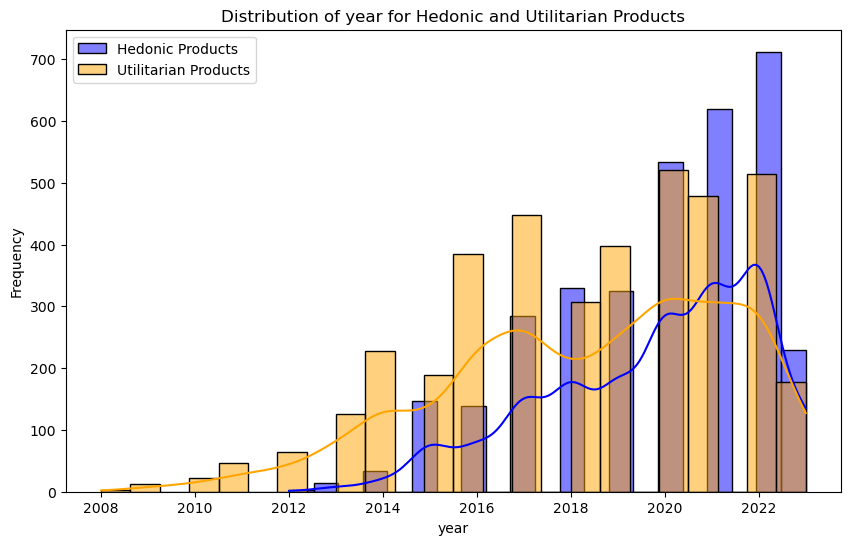

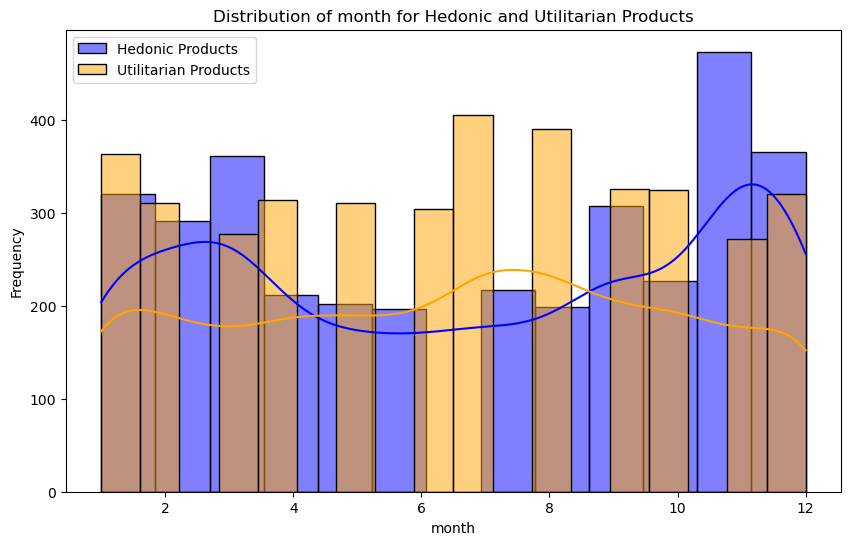

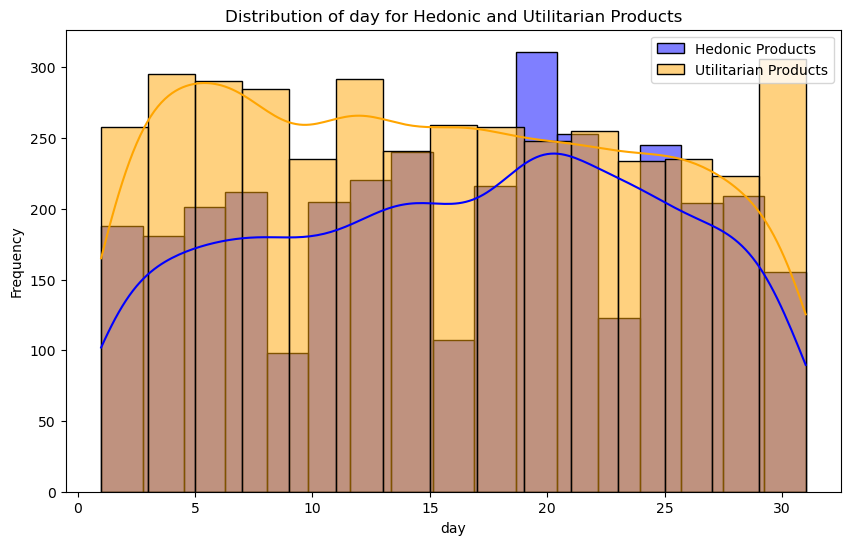

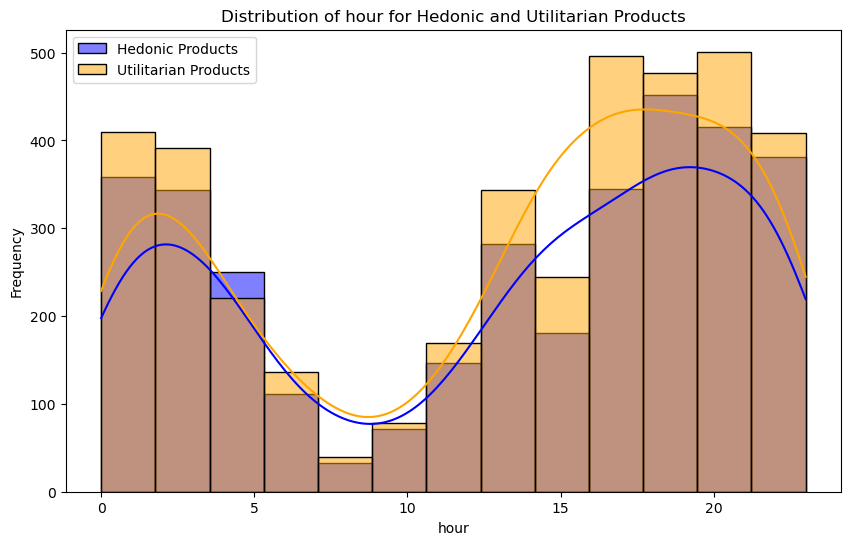

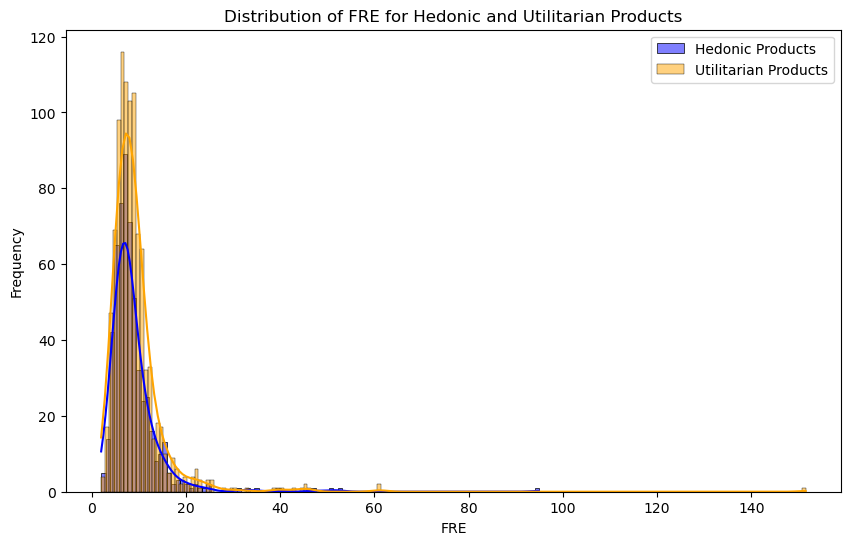

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE'
]

# Subset the data to include only hedonic products
hedonic_data = data_hedonic[data_hedonic['helpful_vote'] != 0]

# Subset the data to include only utilitarian products
utilitarian_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(hedonic_data[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(utilitarian_data[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

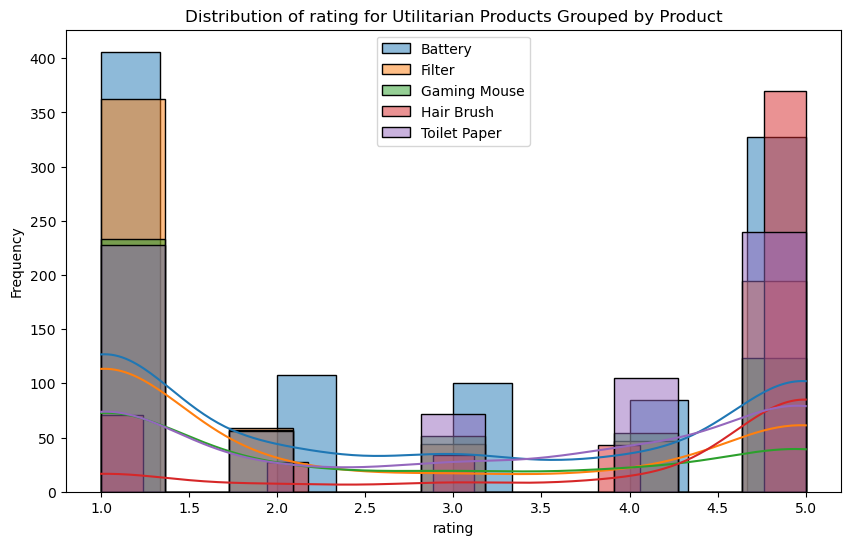

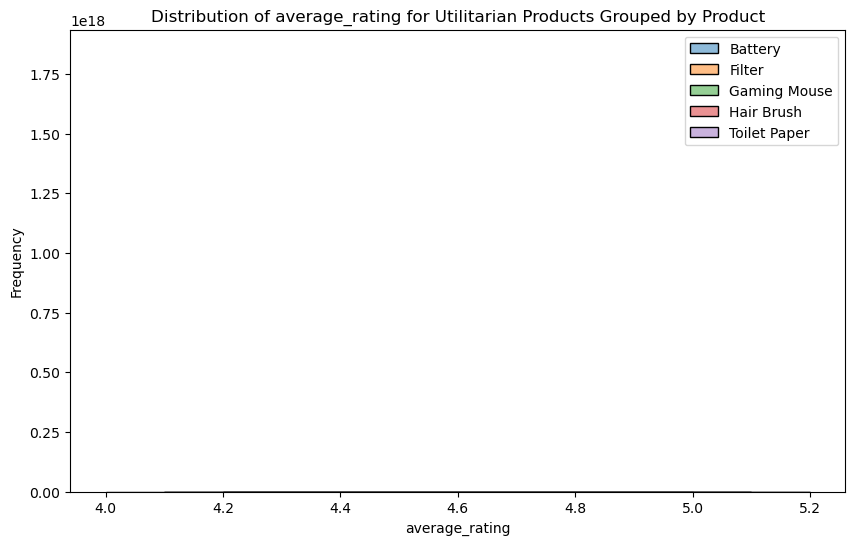

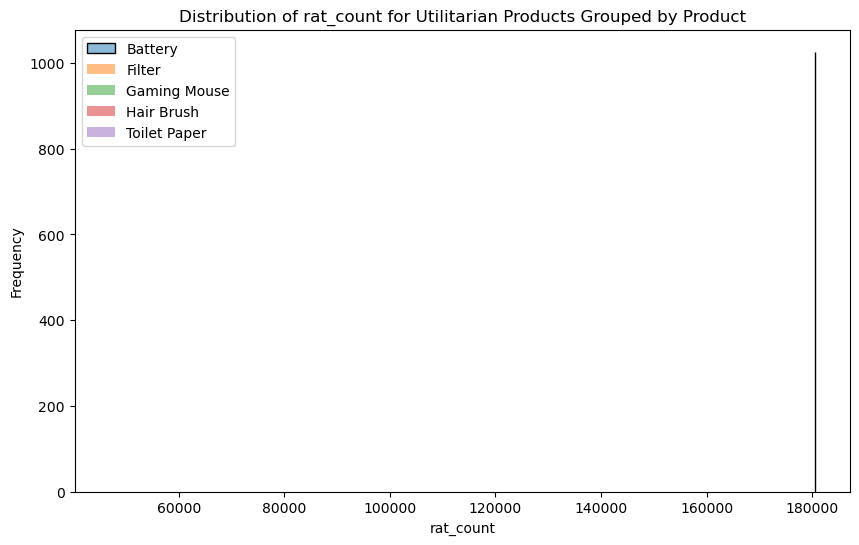

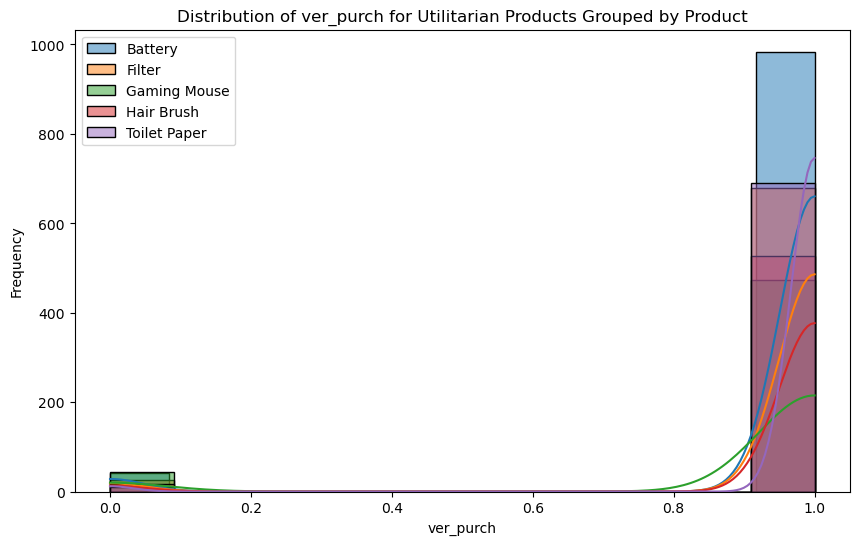

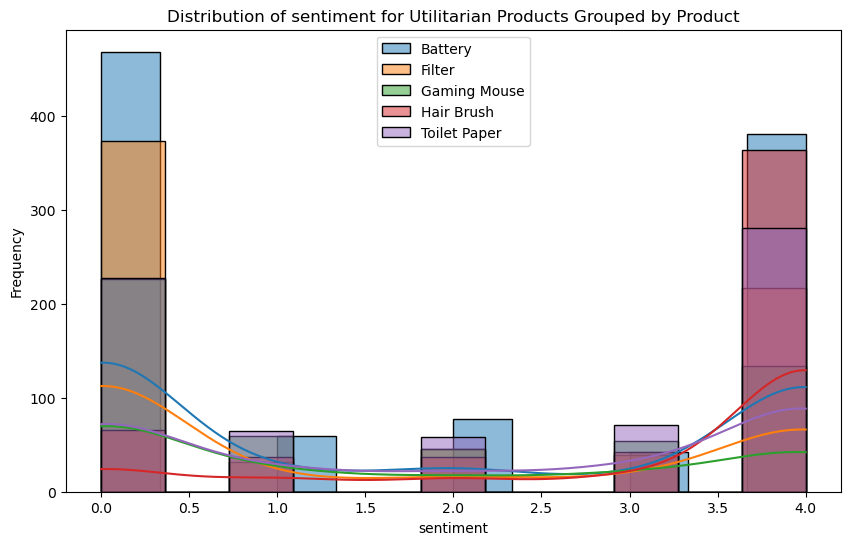

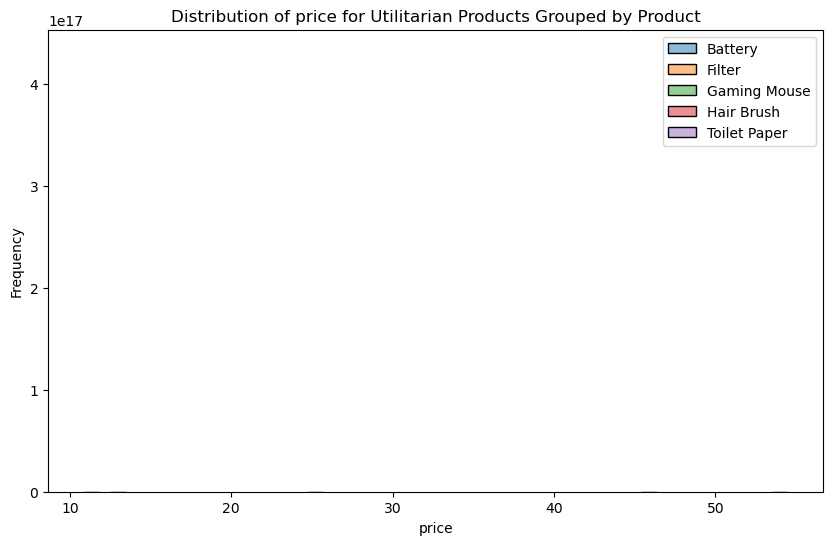

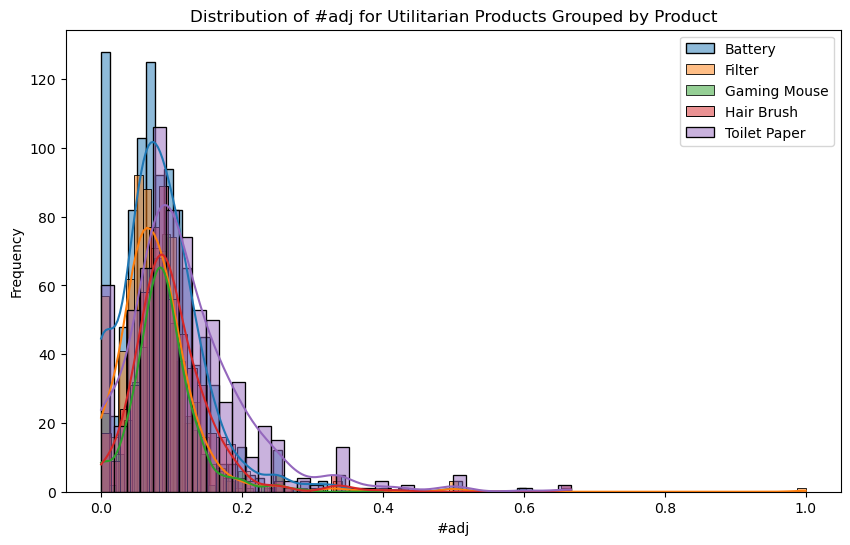

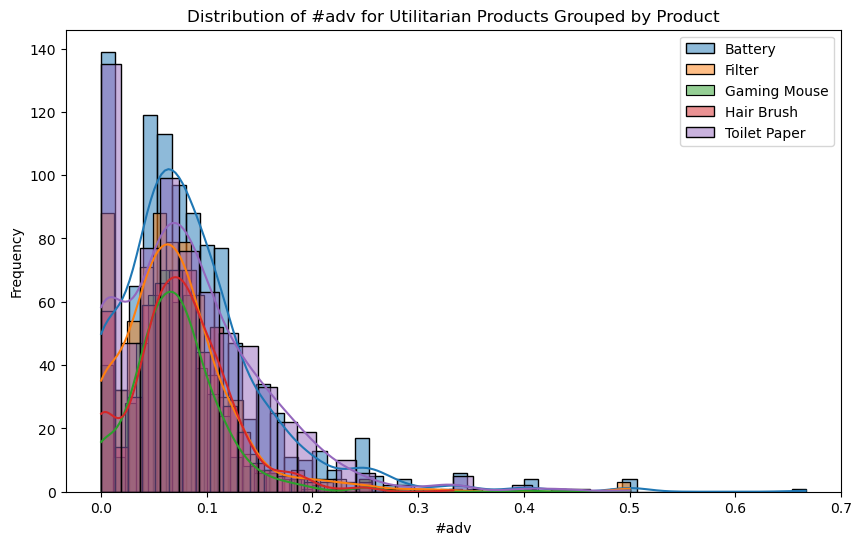

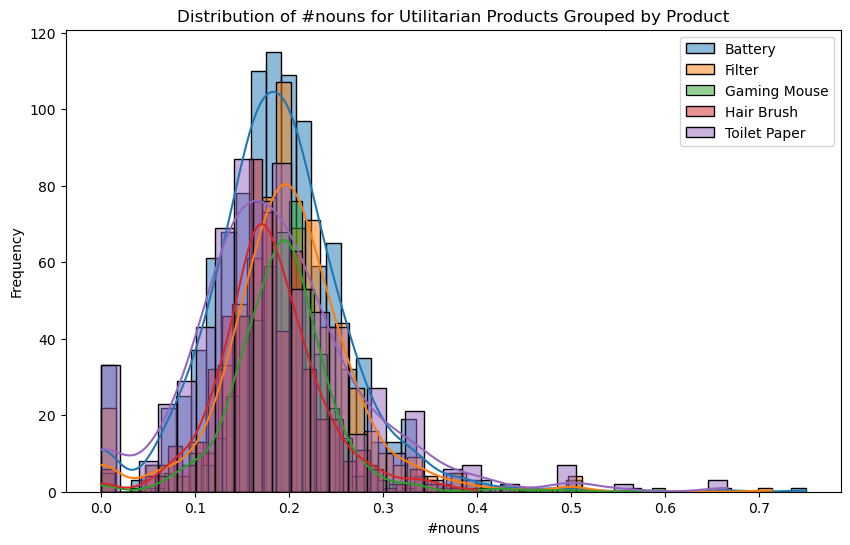

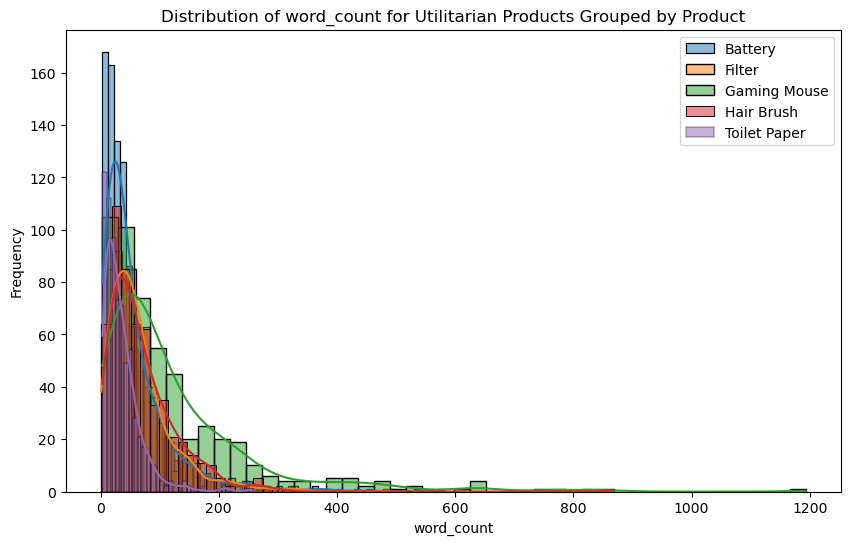

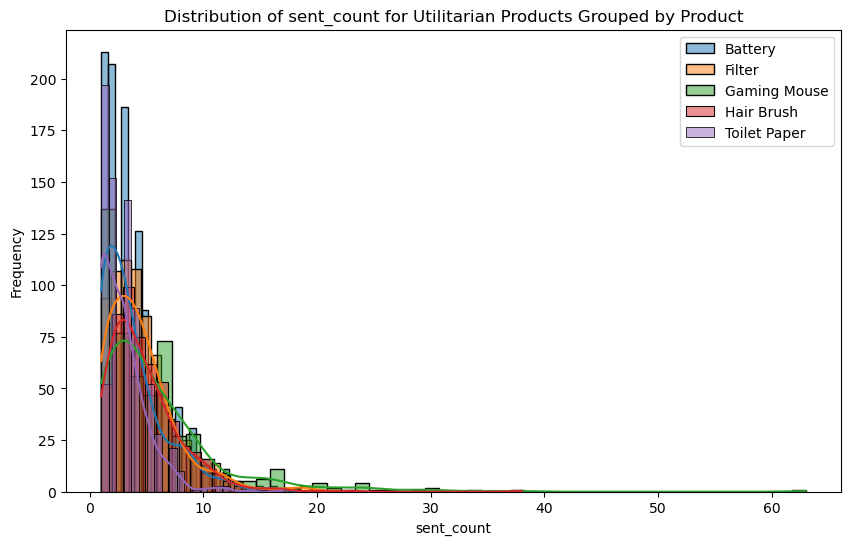

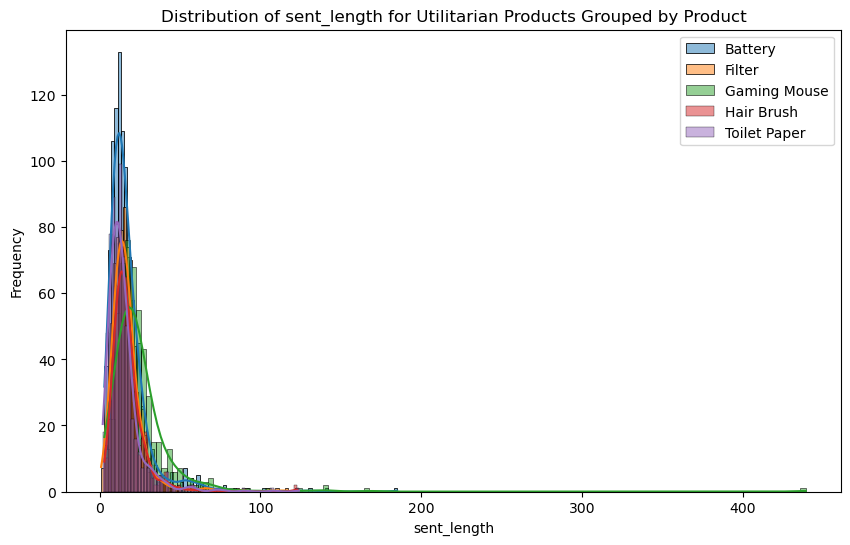

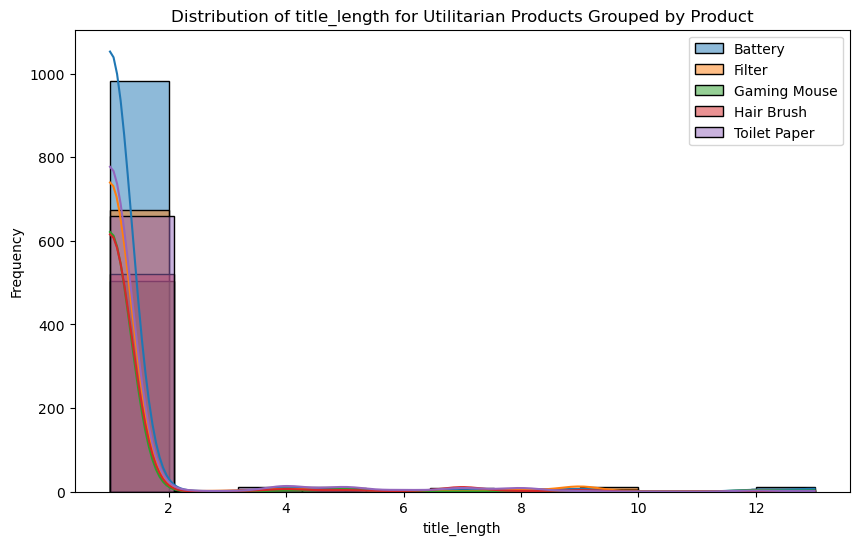

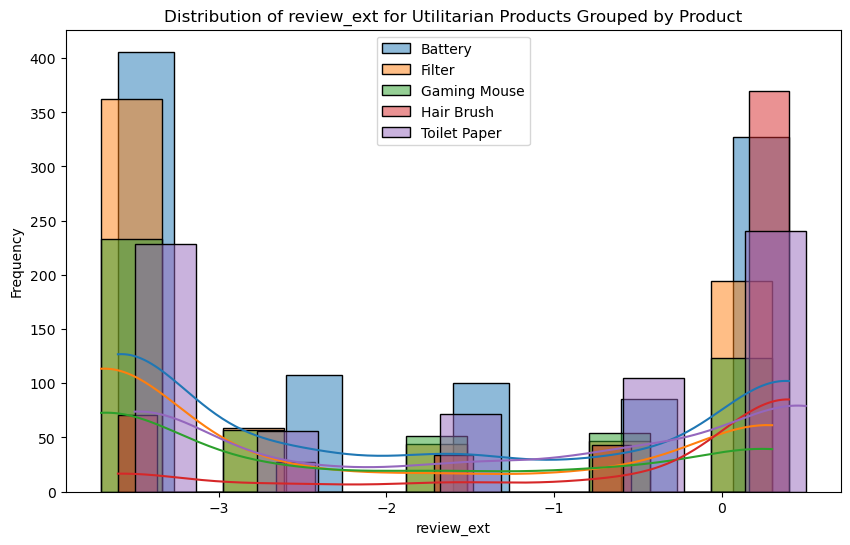

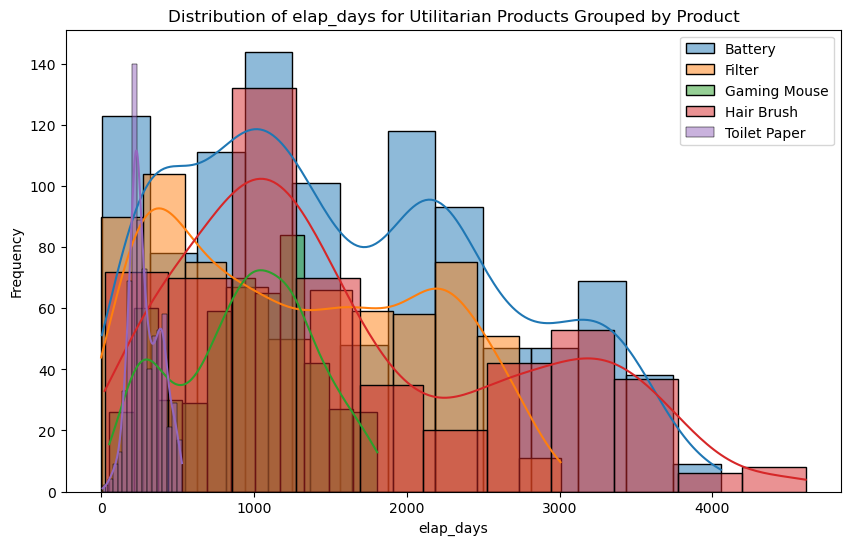

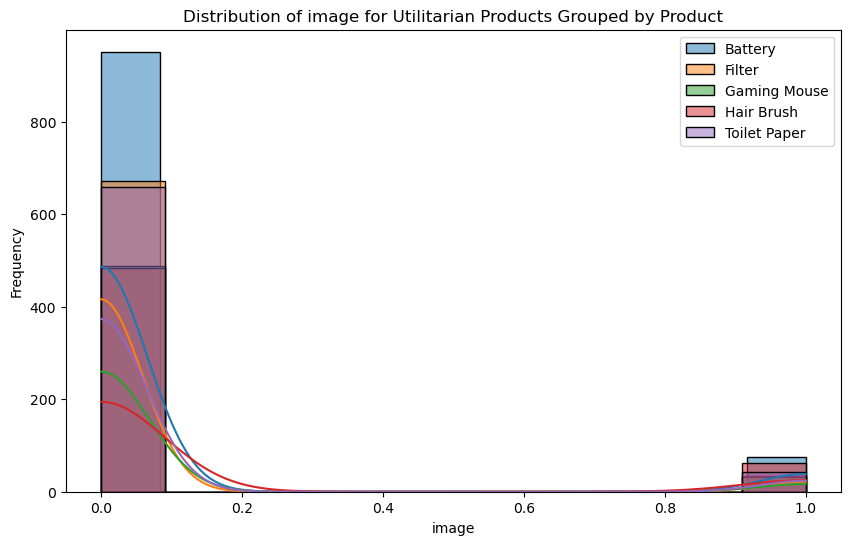

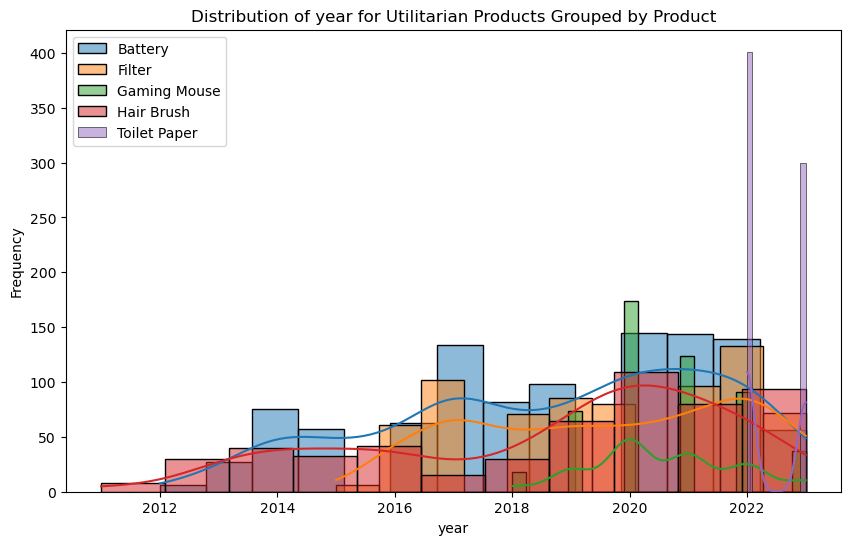

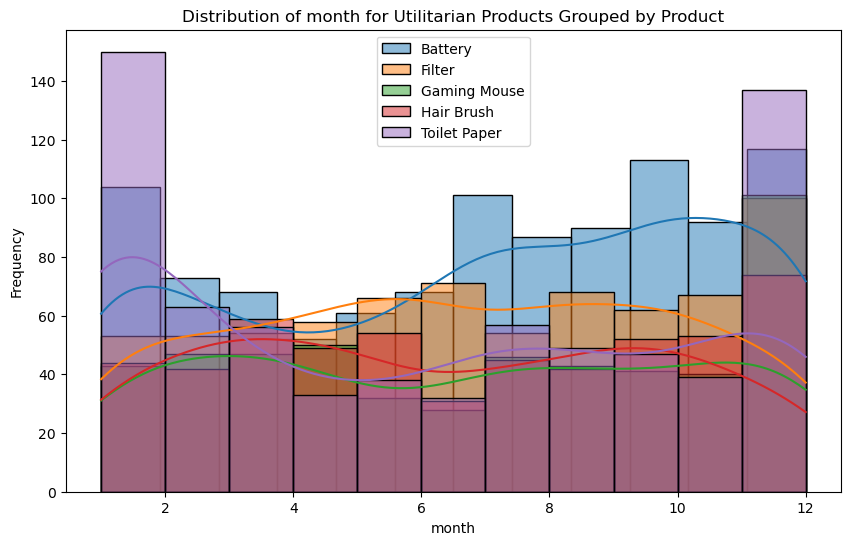

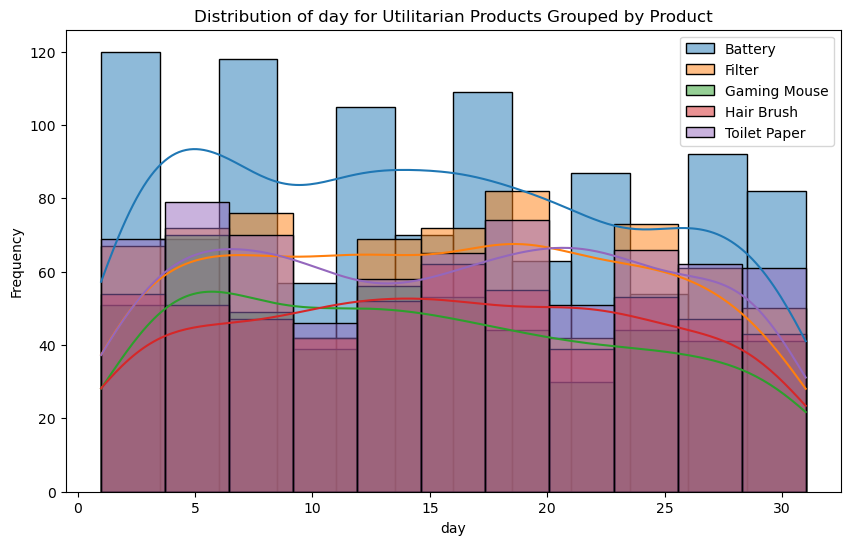

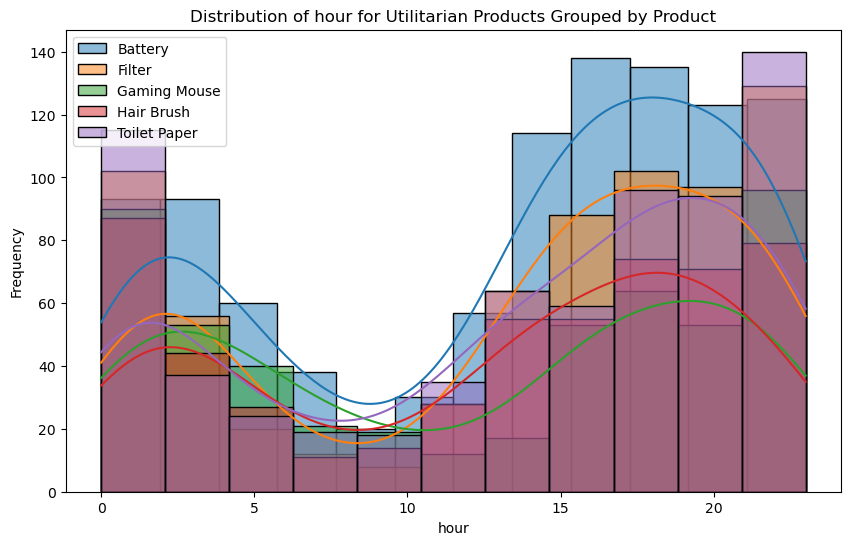

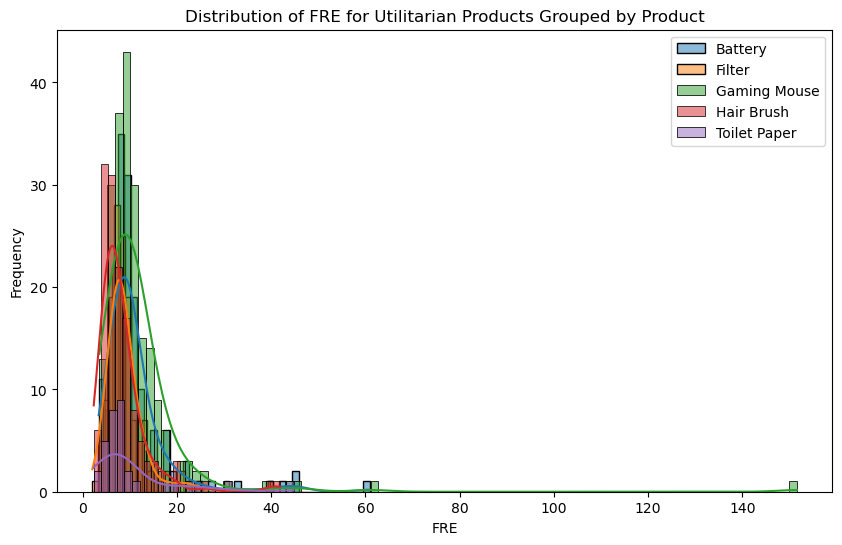

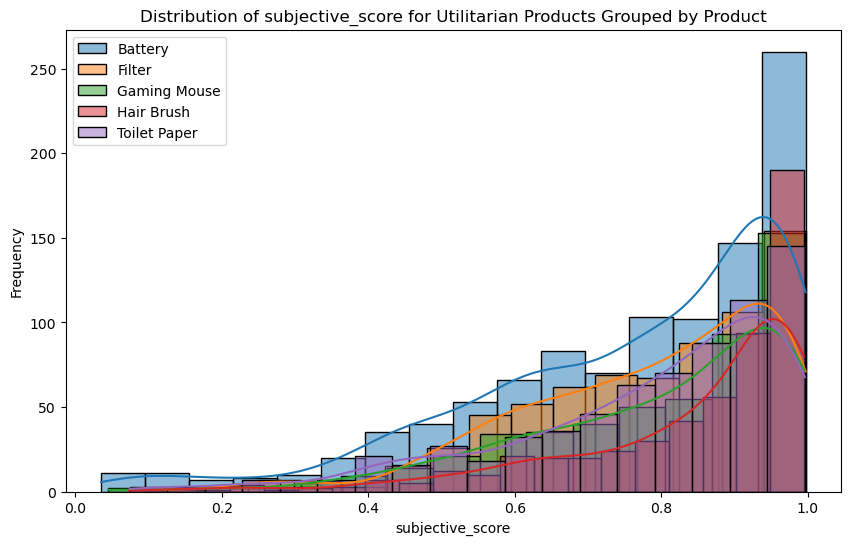

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day', 'hour','FRE','subjective_score'
]

# Subset the data to include only hedonic products
grouped_data = data_utilitarian[data_utilitarian['helpful_vote'] != 0]
grouped_data = utilitarian_data[~utilitarian_data['product'].isin(['Razor'])]


# Group the data by product
grouped_data = grouped_data.groupby('product')

# Visualize the distribution of each feature for hedonic products grouped by product
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Loop through each unique product
    for product, group in grouped_data:
        sns.histplot(group[feature], kde=True, label=product)
    
    plt.title(f'Distribution of {feature} for Utilitarian Products Grouped by Product')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
